# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

# Content
- [Preliminary Data Exploration](#Preliminary_Data_Exploration)
- [Data Cleaning, Missing Values, Duplicates](#Data_Cleaning,Missing_Values,Duplicates)
- [Descriptive Statistics - describe](#Descriptive_Statistics)
- [Number of Launches per Company](#Number_of_Launches_per_Company)
- [Number of Active versus Retired Rockets](#Active_versus_Retired)
- [Distribution of Mission Status](#Mission_Status)
- [How Expensive are the Launches?](#Cost_Launches)
- [Use a Choropleth Map to Show the Number of Launches by Country](#Choropleth_Map_Number_of_Launches_by_Country)
- [Use a Choropleth Map to Show the Number of Failures by Country](#Choropleth_Map_Number_of_Failures_by_Country)
- [Create a Plotly Sunburst Chart of the countries, organisations, and mission status.](#Sunburst_Chart)
- [Analyse the Total Amount of Money Spent by Organisation on Space Missions](#Money_by_Organisation)
- [Analyse the Amount of Money Spent by Organisation per Launch](#Money_by_Organisation_per_Launch)
- [Chart the Number of Launches per Year](#Launches_per_Year)
- [Chart the Number of Launches Month-on-Month until the Present](#Launches_Month-on-Month)
- [Launches per Month: Which months are most popular and least popular for launches?](#popular_for_launches)
- [How has the Launch Price varied Over Time?](#Price_Over_Time)
- [Chart the Number of Launches over Time by the Top 10 Organisations.](#Launches_Top10)
- [Cold War Space Race: USA vs USSR](#Cold_War)
- [Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA](#Pie_Chart)
- [Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers](#Superpowers)
- [Chart the Total Number of Mission Failures Year on Year.](#Failures_Year_on_Year)
- [Chart the Percentage of Failures over Time](#Percentage_Failures)
- [For Every Year Show which Country was in the Lead (in terms of Total Number of Launches up to and including including 2020)](#Country_Lead)
- [Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches](#Organisation_Lead)
    
## Install
- [Country codes](#iso3166)
- [Plotly](#plotly_install)    

## Libraries
- [numpy, pandas, plotly.express, matplotlib.pyplot, seaborn](#import)
- [datetime, iso3166](#import)
- [plotly.express, plotly.offline, plotly.graph_objs, plotly.figure_factory](#Imports_plotly)
    
## Pandas DataFrame
- [load csv data](#load_data)
- [head()/tail(), shape, columns, isna()](#Preliminary_Data_Exploration)
- [drop(columns=[]), isna().any(axis=1), shape, count(), fillna(0, inplace=True), drop_duplicates() ](#Data_Cleaning,Missing_Values,Duplicates)
- [describe(include='all')](#Descriptive_Statistics)
- [groupby('Organisation').count(), groupby('Organisation').count().sort_values('Location', ascending=False)](#Number_of_Launches_per_Company)
- [df['Rocket_Status'].unique(), df['Rocket_Status'].value_counts()](#Active_versus_Retired)
- [pd.DataFrame(list), value_counts(), pd.DataFrame(my_series), rename(columns = {0:'nr_launches'}, inplace = True), reset_index(inplace=True)](#Choropleth_Map_Number_of_Launches_by_Country)
- [loc vs iloc](https://sparkbyexamples.com/pandas/pandas-difference-between-loc-vs-iloc-in-dataframe/)
- [df.loc, groupby('country').count(), reset_index(inplace=True), drop(columns=['Organisation','Location','Date','Detail','Rocket_Status','Price'], inplace=True), rename(columns = {'Mission_Status':'nr_failures'}, inplace = True)](#Choropleth_Map_Number_of_Launches_by_Country)
- [list(df.loc), concat df columns into a new column, combine column conditions to select rows, value_counts(), len of a selection of df rows](#Sunburst_Chart)
- [type(df['Price'][0]), groupby('Organisation')['Price'].sum().sort_values()](#Money_by_Organisation)
- [series1 = df.groupby('Organisation')['Price'].sum()](#Money_by_Organisation_per_Launch)
- [series = df['year'].value_counts().sort_index()](#Launches_per_Year)
- ['year_month' column created from a list, rolling mean: time_series_df_column.rolling(12).mean(), time_series_df_columns.plot(), time_series_df = time_series.to_frame()](#Launches_Month-on-Month)
- [series = df['month'].value_counts().sort_index()](#popular_for_launches)
- [create a new df from an old df by selecting a price > 0, series = df_cost.groupby('year') select column and apply function mean()](#Price_Over_Time)
- [series2 = df.groupby('Organisation') select col + apply count()+ sort_values(ascending=False), df_top10 = select rows with isin(top10), year_start apply min() on year column, year_end apply max() on year column, select rows from df_top10 by combining conditons on cols 'Organisation' and 'year',  , use iloc (search by index), apply mean() function on Price column](#Launches_Top10)
- [df_RUS_KAZ select rows with isin()](#Cold_War)
- [df_cold_war = pd.concat([series_USA, series_RUS_KAZ], axis=1), df_cold_war.rename(columns={"Date": "USA", "country": "RUS_KAZ"}, inplace=True)](#Pie_Chart)
- [ser_failures = df_failures.groupby('year')['Date'].count()](#Failures_Year_on_Year)
- [series = df.groupby(['year', 'country'])['Date'].count(), df_lead = series.reset_index(), ix = df_lead_yr['nr_launches'].idxmax(), max_launches = df_lead_yr.loc[ix]['nr_launches'], df_lead_countries = pd.DataFrame({'country': lst_cty, 'nr_launches': lst_max_launches}, index=lst_index), list(df_lead_countries.index)](#Country_Lead)
- [series = df.groupby(['year', 'Organisation'])['Date'].count(),(), df_lead = series.reset_index(), ix = df_lead_yr['nr_launches'].idxmax(), max_launches = df_lead_yr.loc[ix]['nr_launches'], df_lead_orgs = pd.DataFrame({'org': lst_org, 'nr_launches': lst_max_launches}, index=lst_index), list(df_lead_orgs.index)](#Organisation_Lead)
    
## Pandas Series
- [pd.Series(s_price).value_counts()](#Cost_Launches)
- [series1 = df.groupby('Organisation')['Price'].sum(), series2 = df['Organisation'].value_counts(), floating division of two series objects or division of a series with a scalar value: series1.div(series2).sort_values()](#Money_by_Organisation_per_Launch)
- [series = df['year'].value_counts().sort_index()](#Launches_per_Year)
- [time_series = df['year_month'].value_counts().sort_index(), time_series_df = time_series.to_frame(), print(time_series.idxmax(), time_series.max())](#Launches_Month-on-Month)
- [series = df['month'].value_counts().sort_index()](#popular_for_launches)
- [series = df_cost.groupby('year')['Price'].mean(), series.values, series.index, df_cost.groupby('year')['Price'].mean()](#Price_Over_Time)
- [series2 = df.groupby('Organisation')['Date'].count().sort_values(ascending=False), series = series2[:10], top10 = list(series.index), series = pd.Series(lst_values, index =lst_index)](#Launches_Top10)
- [series_USA = df_USA.groupby('year')['Date'].count()](#Cold_War)
- [nr_USA = series_USA.sum()](#Pie_Chart)
- [series_USA.index.tolist()](#Superpowers)
- [ser_failures = df_failures.groupby('year')['Date'].count()](#Failures_Year_on_Year)
- [division of series: dic[year] = round(100 * ser_failures[str(year)]/ser_launches[str(year)], 2), series_failure_perc = pd.Series(dic)](#Percentage_Failures)
- [series = df.groupby(['year', 'country'])['Date'].count(), df_lead = series.reset_index()](#Country_Lead)
- [series = df.groupby(['year', 'Organisation'])['Date'].count(), df_lead = series.reset_index()](#Organisation_Lead)
    
## MatPlotLib
- [plot.bar(), xticks(rotation=90), plt.subplots(figsize=(8,12)), hor. bar chart, plt.title(), plt.xlabel(), plt.ylabel(), plt.margins(), plt.savefig(), plt.show() ](#Number_of_Launches_per_Company)
- [histogram: counts, bins = np.histogram(s_price); plt.stairs(counts, bins), plt.hist(bins[:-1], bins, weights=counts)](#Cost_Launches)
- [hor.bar chart ax.barh()](#Money_by_Organisation)
- [hor.bar chart ax.barh()](#Money_by_Organisation_per_Launch)
- [plt.xticks(rotation = 90)](#Launches_per_Year)
- [bar chart, horizontal bar chart](#Launches_Month-on-Month)
- [bar chart](#popular_for_launches)
- [line chart, x_axis = series.index, y_axis = series.values, plt.plot(x_axis, y_axis, color='blue', marker='o')](#Price_Over_Time)
- [line chart, line chart with 2 lines, line chart with multiple lines](#Launches_Top10)
- [line chart with 2 lines: x_axis = series_USA.index, y_axis = series_USA.values, plt.plot(x_axis, y_axis, color='blue', marker='o', label='USA')](#Cold_War)
- [bar chart with 2 bars per year for comparison, plt.legend()](#Superpowers)
- [bar chart, x = ser_failures.index.tolist(), y = ser_failures.tolist(), plt.bar(x, y, label='Failure')](#Failures_Year_on_Year)
- [line chart](#Percentage_Failures)
- [bar chart with labels on the bar, plt.text(x,y,z)](#Country_Lead)
- [bar chart with labels on the bar, plt.text(x,y,z)](#Organisation_Lead)
    
## Plotly
- [px.choropleth(), fig.update_layout(), fig.write_image(), fig.show(), example data data., (), create_table(), py.iplot(table), px.bar()](#Choropleth_Map_Number_of_Launches_by_Country)
- [px.choropleth(), fig.update_layout(), fig.show()](#Choropleth_Map_Number_of_Failures_by_Country)
- [px.sunburst(), fig.update_layout (), fig.show()](#Sunburst_Chart)
- [fig = px.pie(values=data, names=cols, title='USA vs RUS_KAZ')](#Pie_Chart)

## Varia
- [presentation: pd.options.display.float_format = '{:,.2f}'.format](#presentation)
- [list comprehension](#Choropleth_Map_Number_of_Launches_by_Country)
- [list comprehension](#Choropleth_Map_Number_of_Failures_by_Country)
- [list comprehension, concatenate lists](#Sunburst_Chart)
- [list comprehension year](#Launches_per_Year)
- [convert_month(name), list comprehension year_month](#Launches_Month-on-Month)
- [list comprehension](#popular_for_launches)


### Install Package with Country Codes
<a id="iso3166"></a>

In [2]:
%pip install iso3166

### Upgrade Plotly
<a id="plotly_install"></a>
Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.12.0)


### Import Statements
<a id="import"></a>

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation
<a id="presentation"></a>

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data
<a id="load_data"></a>

In [4]:
df_original = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration
<a id="Preliminary_Data_Exploration"></a>

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
df_original.head()

Unnamed: 0  Unnamed: 0.1 Organisation  \
0           0             0       SpaceX   
1           1             1         CASC   
2           2             2       SpaceX   
3           3             3    Roscosmos   
4           4             4          ULA   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status  
0  StatusActive   50.0        Success  
1  StatusActive  29.75        Success  
2  StatusActive    NaN        Success  
3  StatusActive   65.0        Success  
4  StatusActive  145.0        Success

In [6]:
df_original.shape

(4324, 9)

In [7]:
df_original.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [8]:
df_original.isna()

Unnamed: 0  Unnamed: 0.1  Organisation  Location   Date  Detail  \
0          False         False         False     False  False   False   
1          False         False         False     False  False   False   
2          False         False         False     False  False   False   
3          False         False         False     False  False   False   
4          False         False         False     False  False   False   
...          ...           ...           ...       ...    ...     ...   
4319       False         False         False     False  False   False   
4320       False         False         False     False  False   False   
4321       False         False         False     False  False   False   
4322       False         False         False     False  False   False   
4323       False         False         False     False  False   False   

      Rocket_Status  Price  Mission_Status  
0             False  False           False  
1             False  False           False  
2             False   True           False  
3             False  False           False  
4             False  False           False  
...             ...    ...             ...  
4319          False   True           False  
4320          False   True           False  
4321          False   True           False  
4322          False   True           False  
4323          False   True           False  

[4324 rows x 9 columns]

In [9]:
df_original.tail()

Unnamed: 0  Unnamed: 0.1 Organisation  \
4319        4319          4319      US Navy   
4320        4320          4320         AMBA   
4321        4321          4321      US Navy   
4322        4322          4322    RVSN USSR   
4323        4323          4323    RVSN USSR   

                                       Location                        Date  \
4319   LC-18A, Cape Canaveral AFS, Florida, USA  Wed Feb 05, 1958 07:33 UTC   
4320   LC-26A, Cape Canaveral AFS, Florida, USA  Sat Feb 01, 1958 03:48 UTC   
4321   LC-18A, Cape Canaveral AFS, Florida, USA  Fri Dec 06, 1957 16:44 UTC   
4322  Site 1/5, Baikonur Cosmodrome, Kazakhstan  Sun Nov 03, 1957 02:30 UTC   
4323  Site 1/5, Baikonur Cosmodrome, Kazakhstan  Fri Oct 04, 1957 19:28 UTC   

                          Detail  Rocket_Status Price Mission_Status  
4319   Vanguard | Vanguard TV3BU  StatusRetired   NaN        Failure  
4320         Juno I | Explorer 1  StatusRetired   NaN        Success  
4321     Vanguard | Vanguard TV3  StatusRetired   NaN        Failure  
4322  Sputnik 8K71PS | Sputnik-2  StatusRetired   NaN        Success  
4323  Sputnik 8K71PS | Sputnik-1  StatusRetired   NaN        Success

## Data Cleaning - Check for Missing Values and Duplicates
<a id="Data_Cleaning,Missing_Values,Duplicates"></a>
Consider removing columns containing junk data. 

In [10]:
df = df_original.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [11]:
df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive   50.0   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive    NaN   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive   65.0   
4                       Atlas V 541 | Perseverance   StatusActive  145.0   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired    NaN   
4320                           Juno I | Explorer 1  StatusRetired    NaN   
4321                       Vanguard | Vanguard TV3  StatusRetired    NaN   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired    NaN   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired    NaN   

     Mission_Status  
0           Success  
1           Success  
2           Success  
3           Success  
4           Success  
...             ...  
4319        Failure  
4320        Success  
4321        Failure  
4322        Success  
4323        Success  

[4324 rows x 7 columns]

In [12]:
df[df.isna().any(axis=1)]

Organisation                                         Location  \
2          SpaceX                    Pad A, Boca Chica, Texas, USA   
7            CASC  LC-101, Wenchang Satellite Launch Center, China   
13            IAI                 Pad 1, Palmachim Airbase, Israel   
28         VKS RF           Site 43/4, Plesetsk Cosmodrome, Russia   
31         ExPace  Site 95, Jiuquan Satellite Launch Center, China   
...           ...                                              ...   
4319      US Navy         LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA         LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy         LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date                                   Detail  \
2     Tue Aug 04, 2020 23:57 UTC       Starship Prototype | 150 Meter Hop   
7     Thu Jul 23, 2020 04:41 UTC                 Long March 5 | Tianwen-1   
13    Mon Jul 06, 2020 01:00 UTC                       Shavit-2 | Ofek-16   
28    Fri May 22, 2020 07:31 UTC        Soyuz 2.1b/Fregat-M | Cosmos 2546   
31    Tue May 12, 2020 01:16 UTC  Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02   
...                          ...                                      ...   
4319  Wed Feb 05, 1958 07:33 UTC                Vanguard | Vanguard TV3BU   
4320  Sat Feb 01, 1958 03:48 UTC                      Juno I | Explorer 1   
4321  Fri Dec 06, 1957 16:44 UTC                  Vanguard | Vanguard TV3   
4322  Sun Nov 03, 1957 02:30 UTC               Sputnik 8K71PS | Sputnik-2   
4323  Fri Oct 04, 1957 19:28 UTC               Sputnik 8K71PS | Sputnik-1   

      Rocket_Status Price Mission_Status  
2      StatusActive   NaN        Success  
7      StatusActive   NaN        Success  
13     StatusActive   NaN        Success  
28     StatusActive   NaN        Success  
31     StatusActive   NaN        Success  
...             ...   ...            ...  
4319  StatusRetired   NaN        Failure  
4320  StatusRetired   NaN        Success  
4321  StatusRetired   NaN        Failure  
4322  StatusRetired   NaN        Success  
4323  StatusRetired   NaN        Success  

[3360 rows x 7 columns]

In [13]:
df.shape

(4324, 7)

In [14]:
df.count()

Organisation      4324
Location          4324
Date              4324
Detail            4324
Rocket_Status     4324
Price              964
Mission_Status    4324
dtype: int64

In [15]:
df.fillna(0, inplace=True)

In [16]:
df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive   50.0   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive      0   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive   65.0   
4                       Atlas V 541 | Perseverance   StatusActive  145.0   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired      0   
4320                           Juno I | Explorer 1  StatusRetired      0   
4321                       Vanguard | Vanguard TV3  StatusRetired      0   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired      0   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired      0   

     Mission_Status  
0           Success  
1           Success  
2           Success  
3           Success  
4           Success  
...             ...  
4319        Failure  
4320        Success  
4321        Failure  
4322        Success  
4323        Success  

[4324 rows x 7 columns]

In [17]:
df.count()

Organisation      4324
Location          4324
Date              4324
Detail            4324
Rocket_Status     4324
Price             4324
Mission_Status    4324
dtype: int64

In [18]:
df_clean = df.drop_duplicates()

In [19]:
df_clean.count()

Organisation      4323
Location          4323
Date              4323
Detail            4323
Rocket_Status     4323
Price             4323
Mission_Status    4323
dtype: int64

In [20]:
df = df_clean

In [21]:
df.count()

Organisation      4323
Location          4323
Date              4323
Detail            4323
Rocket_Status     4323
Price             4323
Mission_Status    4323
dtype: int64

## Descriptive Statistics
<a id="Descriptive_Statistics"></a>

In [22]:
df.describe(include='all')

Organisation                                    Location  \
count          4323                                        4323   
unique           56                                         137   
top       RVSN USSR  Site 31/6, Baikonur Cosmodrome, Kazakhstan   
freq           1777                                         235   

                              Date                               Detail  \
count                         4323                                 4323   
unique                        4319                                 4278   
top     Sun Aug 25, 1991 08:40 UTC  Cosmos-3MRB (65MRB) | BOR-5 Shuttle   
freq                             2                                    6   

        Rocket_Status  Price Mission_Status  
count            4323   4323           4323  
unique              2     57              4  
top     StatusRetired      0        Success  
freq             3534   3360           3878

# Number of Launches per Company
<a id="Number_of_Launches_per_Company"></a>

Create a chart that shows the number of space mission launches by organisation.

In [23]:
df.groupby('Organisation').count()

Location  Date  Detail  Rocket_Status  Price  Mission_Status
Organisation                                                                  
AEB                      3     3       3              3      3               3
AMBA                     8     8       8              8      8               8
ASI                      9     9       9              9      9               9
Arianespace            279   279     279            279    279             279
Arm??e de l'Air          4     4       4              4      4               4
Blue Origin             12    12      12             12     12              12
Boeing                 136   136     136            136    136             136
CASC                   250   250     250            250    250             250
CASIC                    5     5       5              5      5               5
CECLES                   4     4       4              4      4               4
CNES                     8     8       8              8      8               8
Douglas                  1     1       1              1      1               1
EER                      1     1       1              1      1               1
ESA                     13    13      13             13     13              13
Eurockot                13    13      13             13     13              13
ExPace                  10    10      10             10     10              10
Exos                     4     4       4              4      4               4
General Dynamics       251   251     251            251    251             251
IAI                     11    11      11             11     11              11
ILS                     46    46      46             46     46              46
IRGC                     1     1       1              1      1               1
ISA                     13    13      13             13     13              13
ISAS                    30    30      30             30     30              30
ISRO                    76    76      76             76     76              76
JAXA                     7     7       7              7      7               7
KARI                     3     3       3              3      3               3
KCST                     5     5       5              5      5               5
Khrunichev               1     1       1              1      1               1
Kosmotras               22    22      22             22     22              22
Land Launch              7     7       7              7      7               7
Landspace                1     1       1              1      1               1
Lockheed                79    79      79             79     79              79
MHI                     84    84      84             84     84              84
MITT                     7     7       7              7      7               7
Martin Marietta        114   114     114            114    114             114
NASA                   203   203     203            203    203             203
Northrop                83    83      83             83     83              83
OKB-586                  2     2       2              2      2               2
OneSpace                 1     1       1              1      1               1
RAE                      2     2       2              2      2               2
RVSN USSR             1777  1777    1777           1777   1777            1777
Rocket Lab              13    13      13             13     13              13
Roscosmos               55    55      55             55     55              55
SRC                      3     3       3              3      3               3
Sandia                   1     1       1              1      1               1
Sea Launch              36    36      36             36     36              36
SpaceX                 100   100     100            100    100             100
Starsem                  1     1       1              1      1               1
ULA                    140   140     140            140    140      

In [24]:
df.groupby('Organisation').count().sort_values('Location', ascending=False)

Location  Date  Detail  Rocket_Status  Price  Mission_Status
Organisation                                                                  
RVSN USSR             1777  1777    1777           1777   1777            1777
Arianespace            279   279     279            279    279             279
General Dynamics       251   251     251            251    251             251
CASC                   250   250     250            250    250             250
NASA                   203   203     203            203    203             203
VKS RF                 201   201     201            201    201             201
US Air Force           161   161     161            161    161             161
ULA                    140   140     140            140    140             140
Boeing                 136   136     136            136    136             136
Martin Marietta        114   114     114            114    114             114
SpaceX                 100   100     100            100    100             100
MHI                     84    84      84             84     84              84
Northrop                83    83      83             83     83              83
Lockheed                79    79      79             79     79              79
ISRO                    76    76      76             76     76              76
Roscosmos               55    55      55             55     55              55
ILS                     46    46      46             46     46              46
Sea Launch              36    36      36             36     36              36
ISAS                    30    30      30             30     30              30
Kosmotras               22    22      22             22     22              22
US Navy                 17    17      17             17     17              17
Eurockot                13    13      13             13     13              13
ISA                     13    13      13             13     13              13
Rocket Lab              13    13      13             13     13              13
ESA                     13    13      13             13     13              13
Blue Origin             12    12      12             12     12              12
IAI                     11    11      11             11     11              11
ExPace                  10    10      10             10     10              10
ASI                      9     9       9              9      9               9
CNES                     8     8       8              8      8               8
AMBA                     8     8       8              8      8               8
Land Launch              7     7       7              7      7               7
MITT                     7     7       7              7      7               7
JAXA                     7     7       7              7      7               7
UT                       5     5       5              5      5               5
CASIC                    5     5       5              5      5               5
KCST                     5     5       5              5      5               5
CECLES                   4     4       4              4      4               4
Exos                     4     4       4              4      4               4
Arm??e de l'Air          4     4       4              4      4               4
SRC                      3     3       3              3      3               3
AEB                      3     3       3              3      3               3
KARI                     3     3       3              3      3               3
RAE                      2     2       2              2      2               2
OKB-586                  2     2       2              2      2               2
Yuzhmash                 2     2       2              2      2               2
OneSpace                 1     1       1              1      1               1
Sandia                   1     1       1              1      1               1
Landspace                1     1       1              1      1      

In [25]:
org_data = df.groupby('Organisation').count().sort_values('Location', ascending=False)['Location']

In [26]:
org_data

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 250
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
Eurockot              13
ISA                   13
Rocket Lab            13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
Land Launch            7
MITT                   7
JAXA                   7
UT                     5
CASIC                  5
KCST                   5
CECLES                 4
Exos                   4
Arm??e de l'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]),
 [Text(0, 0, 'RVSN USSR'),
  Text(1, 0, 'Arianespace'),
  Text(2, 0, 'General Dynamics'),
  Text(3, 0, 'CASC'),
  Text(4, 0, 'NASA'),
  Text(5, 0, 'VKS RF'),
  Text(6, 0, 'US Air Force'),
  Text(7, 0, 'ULA'),
  Text(8, 0, 'Boeing'),
  Text(9, 0, 'Martin Marietta'),
  Text(10, 0, 'SpaceX'),
  Text(11, 0, 'MHI'),
  Text(12, 0, 'Northrop'),
  Text(13, 0, 'Lockheed'),
  Text(14, 0, 'ISRO'),
  Text(15, 0, 'Roscosmos'),
  Text(16, 0, 'ILS'),
  Text(17, 0, 'Sea Launch'),
  Text(18, 0, 'ISAS'),
  Text(19, 0, 'Kosmotras'),
  Text(20, 0, 'US Navy'),
  Text(21, 0, 'Eurockot'),
  Text(22, 0, 'ISA'),
  Text(23, 0, 'Rocket Lab'),
  Text(24, 0, 'ESA'),
  Text(25, 0, 'Blue Origin'),
  Text(26, 0, 'IAI'),
  Text(27, 0, 'ExPace'),
  Text(28, 0, 'ASI'

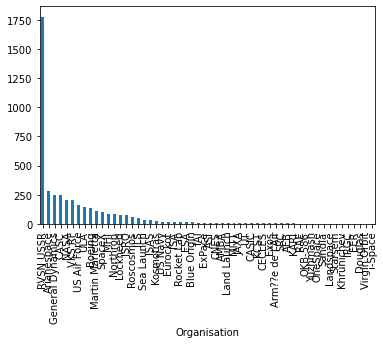

In [27]:
org_data.plot.bar()
plt.xticks(rotation=90)

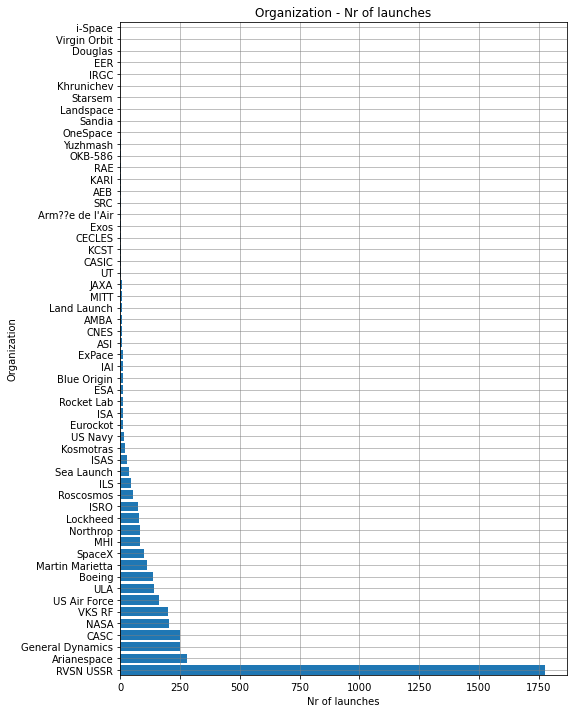

In [28]:
fig, ax = plt.subplots(figsize=(8,12))                             # stretch the plot
ax.barh(org_data.index, org_data.values, orientation='horizontal') # hor.bar chart
ax.grid(color='gray', linestyle='-', linewidth=0.5)                # add grid

plt.title('Organization - Nr of launches')                         # plot title

plt.xlabel('Nr of launches')                                       # x title
plt.ylabel('Organization')                                         # y title

plt.margins(y=0)                                                   # avoid extra space at top and bottom

plt.savefig("nr_launches_per_org.png", facecolor='white', transparent=False, bbox_inches = 'tight') # save plot (do this before show plot)

plt.show()                                                         # show plot

# Number of Active versus Retired Rockets
<a id="Active_versus_Retired"></a>
How many rockets are active compared to those that are decomissioned? 

In [29]:
df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive   50.0   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive      0   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive   65.0   
4                       Atlas V 541 | Perseverance   StatusActive  145.0   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired      0   
4320                           Juno I | Explorer 1  StatusRetired      0   
4321                       Vanguard | Vanguard TV3  StatusRetired      0   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired      0   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired      0   

     Mission_Status  
0           Success  
1           Success  
2           Success  
3           Success  
4           Success  
...             ...  
4319        Failure  
4320        Success  
4321        Failure  
4322        Success  
4323        Success  

[4323 rows x 7 columns]

In [30]:
df['Rocket_Status']

0        StatusActive
1        StatusActive
2        StatusActive
3        StatusActive
4        StatusActive
            ...      
4319    StatusRetired
4320    StatusRetired
4321    StatusRetired
4322    StatusRetired
4323    StatusRetired
Name: Rocket_Status, Length: 4323, dtype: object

In [31]:
df['Rocket_Status'].unique()

array(['StatusActive', 'StatusRetired'], dtype=object)

In [32]:
df['Rocket_Status'].value_counts()

StatusRetired    3534
StatusActive      789
Name: Rocket_Status, dtype: int64

# Distribution of Mission Status
<a id="Mission_Status"></a>

How many missions were successful?
How many missions failed?

In [33]:
df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive   50.0   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive      0   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive   65.0   
4                       Atlas V 541 | Perseverance   StatusActive  145.0   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired      0   
4320                           Juno I | Explorer 1  StatusRetired      0   
4321                       Vanguard | Vanguard TV3  StatusRetired      0   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired      0   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired      0   

     Mission_Status  
0           Success  
1           Success  
2           Success  
3           Success  
4           Success  
...             ...  
4319        Failure  
4320        Success  
4321        Failure  
4322        Success  
4323        Success  

[4323 rows x 7 columns]

In [34]:
df['Mission_Status'].unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [35]:
df['Mission_Status'].value_counts()

Success              3878
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

# How Expensive are the Launches? 
<a id="Cost_Launches"></a>
Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [36]:
df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive   50.0   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive      0   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive   65.0   
4                       Atlas V 541 | Perseverance   StatusActive  145.0   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired      0   
4320                           Juno I | Explorer 1  StatusRetired      0   
4321                       Vanguard | Vanguard TV3  StatusRetired      0   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired      0   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired      0   

     Mission_Status  
0           Success  
1           Success  
2           Success  
3           Success  
4           Success  
...             ...  
4319        Failure  
4320        Success  
4321        Failure  
4322        Success  
4323        Success  

[4323 rows x 7 columns]

In [37]:
df['Price'].describe(include='all')

count     4323
unique      57
top          0
freq      3360
Name: Price, dtype: int64

In [38]:
df['Price'].unique()

array(['50.0', '29.75', 0, '65.0', '145.0', '64.68', '48.5', '90.0',
       '46.0', '28.3', '29.15', '7.5', '30.8', '5.3', '12.0', '112.5',
       '120.0', '153.0', '200.0', '85.0', '115.0', '41.8', '21.0', '31.0',
       '40.0', '164.0', '62.0', '37.0', '350.0', '39.0', '47.0', '35.0',
       '69.7', '109.0', '45.0', '123.0', '130.0', '25.0', '56.5', '15.0',
       '29.0', '80.0', '140.0', '55.0', '59.5', '450.0', '7.0', '20.14',
       '133.0', '190.0', '135.0', '20.0', '136.6', '5,000.0', '1,160.0',
       '59.0', '63.23'], dtype=object)

In [39]:
sorted([float(str(price).replace(',','')) for price in df['Price'].unique()])

[0.0,
 5.3,
 7.0,
 7.5,
 12.0,
 15.0,
 20.0,
 20.14,
 21.0,
 25.0,
 28.3,
 29.0,
 29.15,
 29.75,
 30.8,
 31.0,
 35.0,
 37.0,
 39.0,
 40.0,
 41.8,
 45.0,
 46.0,
 47.0,
 48.5,
 50.0,
 55.0,
 56.5,
 59.0,
 59.5,
 62.0,
 63.23,
 64.68,
 65.0,
 69.7,
 80.0,
 85.0,
 90.0,
 109.0,
 112.5,
 115.0,
 120.0,
 123.0,
 130.0,
 133.0,
 135.0,
 136.6,
 140.0,
 145.0,
 153.0,
 164.0,
 190.0,
 200.0,
 350.0,
 450.0,
 1160.0,
 5000.0]

In [40]:
df['Price'].value_counts()

0          3360
450.0       136
200.0        75
40.0         55
62.0         41
30.8         38
109.0        37
50.0         34
64.68        34
90.0         32
29.75        32
41.8         31
48.5         26
29.15        25
29.0         22
59.0         22
31.0         22
69.7         17
21.0         16
65.0         16
35.0         16
164.0        15
56.5         15
37.0         15
7.5          14
47.0         13
1,160.0      13
25.0         12
350.0        11
153.0        11
45.0         10
112.5         9
5.3           9
123.0         8
85.0          7
120.0         7
145.0         7
80.0          7
115.0         6
46.0          5
7.0           5
59.5          5
136.6         4
63.23         4
140.0         3
130.0         3
133.0         3
190.0         3
5,000.0       2
135.0         2
39.0          2
20.0          1
20.14         1
28.3          1
15.0          1
12.0          1
55.0          1
Name: Price, dtype: int64

In [41]:
s_price = sorted([float(str(price).replace(',','')) for price in df['Price'] if float(str(price).replace(',','')) != 0.0])

In [42]:
 s_price

[5.3,
 5.3,
 5.3,
 5.3,
 5.3,
 5.3,
 5.3,
 5.3,
 5.3,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.5,
 7.5,
 7.5,
 7.5,
 7.5,
 7.5,
 7.5,
 7.5,
 7.5,
 7.5,
 7.5,
 7.5,
 7.5,
 7.5,
 12.0,
 15.0,
 20.0,
 20.14,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 28.3,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.15,
 29.15,
 29.15,
 29.15,
 29.15,
 29.15,
 29.15,
 29.15,
 29.15,
 29.15,
 29.15,
 29.15,
 29.15,
 29.15,
 29.15,
 29.15,
 29.15,
 29.15,
 29.15,
 29.15,
 29.15,
 29.15,
 29.15,
 29.15,
 29.15,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75,
 29.75

In [43]:
pd.Series(s_price).value_counts()

450.00      136
200.00       75
40.00        55
62.00        41
30.80        38
109.00       37
64.68        34
50.00        34
29.75        32
90.00        32
41.80        31
48.50        26
29.15        25
31.00        22
59.00        22
29.00        22
69.70        17
65.00        16
21.00        16
35.00        16
164.00       15
56.50        15
37.00        15
7.50         14
1,160.00     13
47.00        13
25.00        12
153.00       11
350.00       11
45.00        10
112.50        9
5.30          9
123.00        8
80.00         7
85.00         7
145.00        7
120.00        7
115.00        6
59.50         5
46.00         5
7.00          5
136.60        4
63.23         4
133.00        3
130.00        3
140.00        3
190.00        3
135.00        2
39.00         2
5,000.00      2
55.00         1
28.30         1
20.14         1
20.00         1
15.00         1
12.00         1
dtype: int64

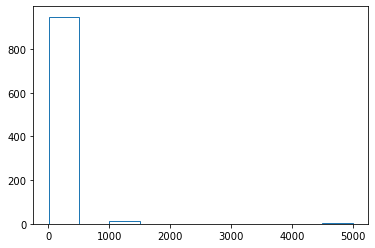

In [44]:
counts, bins = np.histogram(s_price)
plt.stairs(counts, bins)

In [45]:
s_price2 = [price for price in s_price if price < 1000]

(array([373., 235.,  79.,  36.,  78.,   0.,   0.,  11.,   0., 136.]),
 array([  5.3 ,  49.77,  94.24, 138.71, 183.18, 227.65, 272.12, 316.59,
        361.06, 405.53, 450.  ]),
 <BarContainer object of 10 artists>)

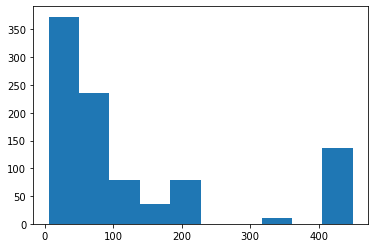

In [46]:
counts, bins = np.histogram(s_price2)
plt.hist(bins[:-1], bins, weights=counts)

# Use a Choropleth Map to Show the Number of Launches by Country
<a id="Choropleth_Map_Number_of_Launches_by_Country"></a>

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [47]:
df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive   50.0   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive      0   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive   65.0   
4                       Atlas V 541 | Perseverance   StatusActive  145.0   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired      0   
4320                           Juno I | Explorer 1  StatusRetired      0   
4321                       Vanguard | Vanguard TV3  StatusRetired      0   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired      0   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired      0   

     Mission_Status  
0           Success  
1           Success  
2           Success  
3           Success  
4           Success  
...             ...  
4319        Failure  
4320        Success  
4321        Failure  
4322        Success  
4323        Success  

[4323 rows x 7 columns]

In [48]:
df["Location"].unique()

array(['LC-39A, Kennedy Space Center, Florida, USA',
       'Site 9401 (SLS-2), Jiuquan Satellite Launch Center, China',
       'Pad A, Boca Chica, Texas, USA',
       'Site 200/39, Baikonur Cosmodrome, Kazakhstan',
       'SLC-41, Cape Canaveral AFS, Florida, USA',
       'LC-9, Taiyuan Satellite Launch Center, China',
       'Site 31/6, Baikonur Cosmodrome, Kazakhstan',
       'LC-101, Wenchang Satellite Launch Center, China',
       'SLC-40, Cape Canaveral AFS, Florida, USA',
       'LA-Y1, Tanegashima Space Center, Japan',
       'LP-0B, Wallops Flight Facility, Virginia, USA',
       'Site 95, Jiuquan Satellite Launch Center, China',
       'LC-3, Xichang Satellite Launch Center, China',
       'Pad 1, Palmachim Airbase, Israel',
       'Rocket Lab LC-1A, M?\x81hia Peninsula, New Zealand',
       'LC-2, Xichang Satellite Launch Center, China',
       'Xichang Satellite Launch Center, China',
       'Cosmic Girl, Mojave Air and Space Port, California, USA',
       'Site 43/4, Plese

In [49]:
cntries = sorted([location.split(',')[-1].strip() for location in df["Location"]])

In [50]:
cntries

['Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Barents Sea',
 'Barents Sea',
 'Barents Sea',
 'Brazil',
 'Brazil',
 'Brazil',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'Chi

In [51]:
countries2 = []

for country in cntries:
    country2 = country
    if country in ["Russia", "Barents Sea"]:
        country2 = "Russian Federation"
    if country == "Yellow Sea":
        country2 = "China"
    if country in ["USA", "Pacific Missile Range Facility", "Pacific Ocean", "New Mexico", "Gran Canaria"]:
        country2 = "United States of America"
    if country in ["Iran", "Shahrud Missile Test Site"]:
        country2 = "Iran, Islamic Republic of"
    if country == "North Korea":
        country2 = "Korea, Democratic People's Republic of"
    if country == "South Korea":
        country2 = "Korea, Republic of"
    countries2.append(country2)
    
print(countries2)

['Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Russian Federation', 'Russian Federation', 'Russian Federation', 'Brazil', 'Brazil', 'Brazil', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China

In [52]:

dic_countries = {}
for c in countries:  # countries comes from iso3166
    print(type(c), c.name, c.alpha3, c)
    dic_countries[c.name.upper()] = c.alpha3
print(dic_countries)
    

<class 'iso3166.Country'> Afghanistan AFG Country(name='Afghanistan', alpha2='AF', alpha3='AFG', numeric='004', apolitical_name='Afghanistan')
<class 'iso3166.Country'> Åland Islands ALA Country(name='Åland Islands', alpha2='AX', alpha3='ALA', numeric='248', apolitical_name='Åland Islands')
<class 'iso3166.Country'> Albania ALB Country(name='Albania', alpha2='AL', alpha3='ALB', numeric='008', apolitical_name='Albania')
<class 'iso3166.Country'> Algeria DZA Country(name='Algeria', alpha2='DZ', alpha3='DZA', numeric='012', apolitical_name='Algeria')
<class 'iso3166.Country'> American Samoa ASM Country(name='American Samoa', alpha2='AS', alpha3='ASM', numeric='016', apolitical_name='American Samoa')
<class 'iso3166.Country'> Andorra AND Country(name='Andorra', alpha2='AD', alpha3='AND', numeric='020', apolitical_name='Andorra')
<class 'iso3166.Country'> Angola AGO Country(name='Angola', alpha2='AO', alpha3='AGO', numeric='024', apolitical_name='Angola')
<class 'iso3166.Country'> Anguilla 

<class 'iso3166.Country'> Switzerland CHE Country(name='Switzerland', alpha2='CH', alpha3='CHE', numeric='756', apolitical_name='Switzerland')
<class 'iso3166.Country'> Syrian Arab Republic SYR Country(name='Syrian Arab Republic', alpha2='SY', alpha3='SYR', numeric='760', apolitical_name='Syrian Arab Republic')
<class 'iso3166.Country'> Taiwan, Province of China TWN Country(name='Taiwan, Province of China', alpha2='TW', alpha3='TWN', numeric='158', apolitical_name='Taiwan')
<class 'iso3166.Country'> Tajikistan TJK Country(name='Tajikistan', alpha2='TJ', alpha3='TJK', numeric='762', apolitical_name='Tajikistan')
<class 'iso3166.Country'> Tanzania, United Republic of TZA Country(name='Tanzania, United Republic of', alpha2='TZ', alpha3='TZA', numeric='834', apolitical_name='Tanzania, United Republic of')
<class 'iso3166.Country'> Thailand THA Country(name='Thailand', alpha2='TH', alpha3='THA', numeric='764', apolitical_name='Thailand')
<class 'iso3166.Country'> Timor-Leste TLS Country(nam

In [53]:
space_countries = [dic_countries[country.upper()] for country in countries2]

In [54]:
space_countries

['AUS',
 'AUS',
 'AUS',
 'AUS',
 'AUS',
 'AUS',
 'RUS',
 'RUS',
 'RUS',
 'BRA',
 'BRA',
 'BRA',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',


In [55]:
my_df = pd.DataFrame(space_countries)
my_df

0
0     AUS
1     AUS
2     AUS
3     AUS
4     AUS
...   ...
4318  USA
4319  USA
4320  USA
4321  USA
4322  CHN

[4323 rows x 1 columns]

In [56]:
my_df.value_counts()

RUS    1398
USA    1387
KAZ     701
FRA     303
CHN     268
JPN     126
IND      76
IRN      14
NZL      13
ISR      11
KEN       9
AUS       6
PRK       5
BRA       3
KOR       3
dtype: int64

In [57]:
type(my_df.value_counts())

pandas.core.series.Series

In [58]:
my_series = my_df.value_counts()
my_df = pd.DataFrame(my_series)
my_df

0
0        
RUS  1398
USA  1387
KAZ   701
FRA   303
CHN   268
JPN   126
IND    76
IRN    14
NZL    13
ISR    11
KEN     9
AUS     6
PRK     5
BRA     3
KOR     3

In [59]:
my_df.rename(columns = {0:'nr_launches'}, inplace = True)
my_df

nr_launches
0               
RUS         1398
USA         1387
KAZ          701
FRA          303
CHN          268
JPN          126
IND           76
IRN           14
NZL           13
ISR           11
KEN            9
AUS            6
PRK            5
BRA            3
KOR            3

In [60]:
my_df.reset_index(inplace=True)
my_df

0  nr_launches
0   RUS         1398
1   USA         1387
2   KAZ          701
3   FRA          303
4   CHN          268
5   JPN          126
6   IND           76
7   IRN           14
8   NZL           13
9   ISR           11
10  KEN            9
11  AUS            6
12  PRK            5
13  BRA            3
14  KOR            3

In [61]:
my_df.rename(columns = {0:'country'}, inplace = True)
my_df

country  nr_launches
0      RUS         1398
1      USA         1387
2      KAZ          701
3      FRA          303
4      CHN          268
5      JPN          126
6      IND           76
7      IRN           14
8      NZL           13
9      ISR           11
10     KEN            9
11     AUS            6
12     PRK            5
13     BRA            3
14     KOR            3

In [62]:
my_df

country  nr_launches
0      RUS         1398
1      USA         1387
2      KAZ          701
3      FRA          303
4      CHN          268
5      JPN          126
6      IND           76
7      IRN           14
8      NZL           13
9      ISR           11
10     KEN            9
11     AUS            6
12     PRK            5
13     BRA            3
14     KOR            3

In [63]:
import plotly.express as px
fig = px.choropleth(data_frame=my_df, 
                    locations='country',
                    locationmode='ISO-3',
                    color='nr_launches',
                    #color_continuous_scale=px.colors.sequential.Plasma,
                    color_continuous_scale="matter",
                    hover_name='country',
                    projection='natural earth'
                   )
#fig.update_layout (title_text = 'Number of launches');
fig.update_layout(title_text = 'Number of launches', title_x = 0.5);    # title_x, title_y in [0,1]
#fig.write_image("choropleth_Nr_launches.png")
fig.show()

In [64]:
import plotly.express as px

fig = px.choropleth(my_df, 
                    locations="country",
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma
                   )
fig.show()

### Imports plotly
<a id="Imports_plotly"></a>

In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px # for visualization 
import plotly.offline as py 
import plotly.graph_objs as go 
from plotly.figure_factory import create_table # for creating nice table 

In [66]:
# load built-in gapminder dataset from plotly 
gapminder = px.data.gapminder() 

In [67]:
# examine first few rows 
gapminder.head() 

country continent  year  lifeExp       pop  gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952    28.80   8425333     779.45       AFG   
1  Afghanistan      Asia  1957    30.33   9240934     820.85       AFG   
2  Afghanistan      Asia  1962    32.00  10267083     853.10       AFG   
3  Afghanistan      Asia  1967    34.02  11537966     836.20       AFG   
4  Afghanistan      Asia  1972    36.09  13079460     739.98       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

In [68]:
# create a publication quality table 
table = create_table(gapminder.head(10))
py.iplot(table)

In [29]:
# filtering data for Canada and store into a variable called canada_data 
canada_data = px.data.gapminder().query("country == 'Canada' ")

In [30]:
# create bar charts 
fig = px.bar(canada_data, x='year', y='pop', height=400)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country
<a id="Choropleth_Map_Number_of_Failures_by_Country"></a>

In [69]:
df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive   50.0   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive      0   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive   65.0   
4                       Atlas V 541 | Perseverance   StatusActive  145.0   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired      0   
4320                           Juno I | Explorer 1  StatusRetired      0   
4321                       Vanguard | Vanguard TV3  StatusRetired      0   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired      0   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired      0   

     Mission_Status  
0           Success  
1           Success  
2           Success  
3           Success  
4           Success  
...             ...  
4319        Failure  
4320        Success  
4321        Failure  
4322        Success  
4323        Success  

[4323 rows x 7 columns]

In [70]:
cntries = [location.split(',')[-1].strip() for location in df["Location"]]

countries2 = []

for country in cntries:
    country2 = country
    if country in ["Russia", "Barents Sea"]:
        country2 = "Russian Federation"
    if country == "Yellow Sea":
        country2 = "China"
    if country in ["USA", "Pacific Missile Range Facility", "Pacific Ocean", "New Mexico", "Gran Canaria"]:
        country2 = "United States of America"
    if country in ["Iran", "Shahrud Missile Test Site"]:
        country2 = "Iran, Islamic Republic of"
    if country == "North Korea":
        country2 = "Korea, Democratic People's Republic of"
    if country == "South Korea":
        country2 = "Korea, Republic of"
    countries2.append(country2)
    
dic_countries = {}
for c in countries:  # countries comes from iso3166
    dic_countries[c.name.upper()] = c.alpha3
space_countries = [dic_countries[country.upper()] for country in countries2]
df['country'] = space_countries

In [71]:
df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive   50.0   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive      0   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive   65.0   
4                       Atlas V 541 | Perseverance   StatusActive  145.0   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired      0   
4320                           Juno I | Explorer 1  StatusRetired      0   
4321                       Vanguard | Vanguard TV3  StatusRetired      0   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired      0   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired      0   

     Mission_Status country  
0           Success     USA  
1           Success     CHN  
2           Success     USA  
3           Success     KAZ  
4           Success     USA  
...             ...     ...  
4319        Failure     USA  
4320        Success     USA  
4321        Failure     USA  
4322        Success     KAZ  
4323        Success     KAZ  

[4323 rows x 8 columns]

In [72]:
df['Mission_Status'].value_counts()

Success              3878
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [73]:
df_failures = df.loc[df['Mission_Status'] != "Success"]

In [74]:
df_failures

Organisation                                           Location  \
11          ExPace    Site 95, Jiuquan Satellite Launch Center, China   
15      Rocket Lab    Rocket Lab LC-1A, M?hia Peninsula, New Zealand   
27    Virgin Orbit  Cosmic Girl, Mojave Air and Space Port, Califo...   
36            CASC       LC-2, Xichang Satellite Launch Center, China   
43            CASC    LC-201, Wenchang Satellite Launch Center, China   
...            ...                                                ...   
4314       US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4315     RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4318          AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4319       US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4321       US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   

                            Date                                       Detail  \
11    Fri Jul 10, 2020 04:17 UTC   Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2   
15    Sat Jul 04, 2020 21:19 UTC  Electron/Curie | Pics Or It Didn??¦t Happen   
27    Mon May 25, 2020 19:50 UTC                    LauncherOne | Demo Flight   
36    Thu Apr 09, 2020 11:46 UTC              Long March 3B/E | Nusantara Dua   
43    Mon Mar 16, 2020 13:34 UTC                        Long March 7A | XJY-6   
...                          ...                                          ...   
4314  Mon Apr 28, 1958 02:53 UTC                      Vanguard | Vanguard TV5   
4315  Sun Apr 27, 1958 09:01 UTC                  Sputnik 8A91 | Sputnik-3 #1   
4318  Wed Mar 05, 1958 18:27 UTC                          Juno I | Explorer 2   
4319  Wed Feb 05, 1958 07:33 UTC                    Vanguard | Vanguard TV3BU   
4321  Fri Dec 06, 1957 16:44 UTC                      Vanguard | Vanguard TV3   

      Rocket_Status  Price Mission_Status country  
11     StatusActive   28.3        Failure     CHN  
15     StatusActive    7.5        Failure     NZL  
27     StatusActive   12.0        Failure     USA  
36     StatusActive  29.15        Failure     CHN  
43     StatusActive      0        Failure     CHN  
...             ...    ...            ...     ...  
4314  StatusRetired      0        Failure     USA  
4315  StatusRetired      0        Failure     KAZ  
4318  StatusRetired      0        Failure     USA  
4319  StatusRetired      0        Failure     USA  
4321  StatusRetired      0        Failure     USA  

[445 rows x 8 columns]

In [75]:
my_df = df_failures.groupby('country').count()
my_df

Organisation  Location  Date  Detail  Rocket_Status  Price  \
country                                                               
AUS                 3         3     3       3              3      3   
BRA                 3         3     3       3              3      3   
CHN                25        25    25      25             25     25   
FRA                18        18    18      18             18     18   
IND                13        13    13      13             13     13   
IRN                 9         9     9       9              9      9   
ISR                 2         2     2       2              2      2   
JPN                13        13    13      13             13     13   
KAZ                93        93    93      93             93     93   
KOR                 2         2     2       2              2      2   
NZL                 2         2     2       2              2      2   
PRK                 3         3     3       3              3      3   
RUS                93        93    93      93             93     93   
USA               166       166   166     166            166    166   

         Mission_Status  
country                  
AUS                   3  
BRA                   3  
CHN                  25  
FRA                  18  
IND                  13  
IRN                   9  
ISR                   2  
JPN                  13  
KAZ                  93  
KOR                   2  
NZL                   2  
PRK                   3  
RUS                  93  
USA                 166

In [76]:
my_df.reset_index(inplace=True)

In [77]:
my_df

country  Organisation  Location  Date  Detail  Rocket_Status  Price  \
0      AUS             3         3     3       3              3      3   
1      BRA             3         3     3       3              3      3   
2      CHN            25        25    25      25             25     25   
3      FRA            18        18    18      18             18     18   
4      IND            13        13    13      13             13     13   
5      IRN             9         9     9       9              9      9   
6      ISR             2         2     2       2              2      2   
7      JPN            13        13    13      13             13     13   
8      KAZ            93        93    93      93             93     93   
9      KOR             2         2     2       2              2      2   
10     NZL             2         2     2       2              2      2   
11     PRK             3         3     3       3              3      3   
12     RUS            93        93    93      93             93     93   
13     USA           166       166   166     166            166    166   

    Mission_Status  
0                3  
1                3  
2               25  
3               18  
4               13  
5                9  
6                2  
7               13  
8               93  
9                2  
10               2  
11               3  
12              93  
13             166

In [78]:
my_df.drop(columns=['Organisation','Location','Date','Detail','Rocket_Status','Price'], inplace=True)
my_df

country  Mission_Status
0      AUS               3
1      BRA               3
2      CHN              25
3      FRA              18
4      IND              13
5      IRN               9
6      ISR               2
7      JPN              13
8      KAZ              93
9      KOR               2
10     NZL               2
11     PRK               3
12     RUS              93
13     USA             166

In [79]:
my_df.rename(columns = {'Mission_Status':'nr_failures'}, inplace = True)
my_df

country  nr_failures
0      AUS            3
1      BRA            3
2      CHN           25
3      FRA           18
4      IND           13
5      IRN            9
6      ISR            2
7      JPN           13
8      KAZ           93
9      KOR            2
10     NZL            2
11     PRK            3
12     RUS           93
13     USA          166

In [145]:
fig = px.choropleth(data_frame=my_df, 
                    locations='country',
                    locationmode='ISO-3',
                    color='nr_failures',
                    color_continuous_scale="matter",
                    hover_name='country',
                    projection='natural earth'
                   )
fig.update_layout (title_text = 'Number of failed missions', title_x = 0.5);    # title_x, title_y in [0,1]
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.
<a id="Sunburst_Chart"></a>

In [80]:
import plotly.express as px
data = dict(
    character=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parent=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    value=[10, 14, 12, 10, 2, 6, 6, 4, 4])

fig = px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
)
fig.show()

In [81]:
data

{'character': ['Eve',
  'Cain',
  'Seth',
  'Enos',
  'Noam',
  'Abel',
  'Awan',
  'Enoch',
  'Azura'],
 'parent': ['', 'Eve', 'Eve', 'Seth', 'Seth', 'Eve', 'Eve', 'Awan', 'Eve'],
 'value': [10, 14, 12, 10, 2, 6, 6, 4, 4]}

In [82]:
df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive   50.0   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive      0   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive   65.0   
4                       Atlas V 541 | Perseverance   StatusActive  145.0   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired      0   
4320                           Juno I | Explorer 1  StatusRetired      0   
4321                       Vanguard | Vanguard TV3  StatusRetired      0   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired      0   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired      0   

     Mission_Status country  
0           Success     USA  
1           Success     CHN  
2           Success     USA  
3           Success     KAZ  
4           Success     USA  
...             ...     ...  
4319        Failure     USA  
4320        Success     USA  
4321        Failure     USA  
4322        Success     KAZ  
4323        Success     KAZ  

[4323 rows x 8 columns]

In [83]:
list(df.loc[df['Organisation'] == 'US Navy']['country'])[0]

'USA'

In [84]:
my_df = df
my_df['cty-org'] = df['country'] + "-" + df['Organisation']
my_df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive   50.0   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive      0   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive   65.0   
4                       Atlas V 541 | Perseverance   StatusActive  145.0   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired      0   
4320                           Juno I | Explorer 1  StatusRetired      0   
4321                       Vanguard | Vanguard TV3  StatusRetired      0   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired      0   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired      0   

     Mission_Status country        cty-org  
0           Success     USA     USA-SpaceX  
1           Success     CHN       CHN-CASC  
2           Success     USA     USA-SpaceX  
3           Success     KAZ  KAZ-Roscosmos  
4           Success     USA        USA-ULA  
...             ...     ...            ...  
4319        Failure     USA    USA-US Navy  
4320        Success     USA       USA-AMBA  
4321        Failure     USA    USA-US Navy  
4322        Success     KAZ  KAZ-RVSN USSR  
4323        Success     KAZ  KAZ-RVSN USSR  

[4323 rows x 9 columns]

In [85]:
ctys = list(my_df['country'].unique())
orgs = list(my_df['cty-org'].unique())
items = ['world'] + ctys + orgs

parent_ctys = ['world' for cty in ctys]
parent_orgs = [list(my_df.loc[df['cty-org'] == org]['country'])[0] for org in orgs]
item_parents = [""] + parent_ctys + parent_orgs


value_world = len(my_df[my_df['Mission_Status'] == "Success"])
value_ctys = [len(my_df[(my_df['Mission_Status'] == "Success") & (my_df['country'] == cty)]) for cty in ctys]
value_orgs =  [len(my_df[(my_df['Mission_Status'] == "Success") & (my_df['cty-org'] == org)]) for org in orgs]
item_values = [value_world] + value_ctys + value_orgs

print(len(items), items)
print(len(item_parents), item_parents)
print(len(item_values),item_values)
for i in range(len(items)):
    print(items[i], item_parents[i], item_values[i])

81 ['world', 'USA', 'CHN', 'KAZ', 'JPN', 'ISR', 'NZL', 'RUS', 'IRN', 'FRA', 'IND', 'PRK', 'KOR', 'BRA', 'KEN', 'AUS', 'USA-SpaceX', 'CHN-CASC', 'KAZ-Roscosmos', 'USA-ULA', 'JPN-JAXA', 'USA-Northrop', 'CHN-ExPace', 'ISR-IAI', 'NZL-Rocket Lab', 'USA-Virgin Orbit', 'RUS-VKS RF', 'JPN-MHI', 'IRN-IRGC', 'KAZ-Arianespace', 'FRA-Arianespace', 'IRN-ISA', 'USA-Blue Origin', 'IND-ISRO', 'USA-Exos', 'KAZ-ILS', 'CHN-i-Space', 'RUS-Roscosmos', 'CHN-OneSpace', 'KAZ-VKS RF', 'CHN-Landspace', 'RUS-Eurockot', 'KAZ-Land Launch', 'CHN-CASIC', 'PRK-KCST', 'USA-Sandia', 'RUS-Kosmotras', 'RUS-Khrunichev', 'USA-Sea Launch', 'KOR-KARI', 'FRA-ESA', 'USA-NASA', 'KAZ-Kosmotras', 'USA-Boeing', 'JPN-ISAS', 'RUS-SRC', 'RUS-MITT', 'USA-ILS', 'USA-Lockheed', 'BRA-AEB', 'KAZ-Starsem', 'RUS-RVSN USSR', 'USA-EER', 'USA-General Dynamics', 'USA-Martin Marietta', 'KAZ-RVSN USSR', 'RUS-Yuzhmash', 'USA-Douglas', 'KEN-ASI', 'USA-US Air Force', 'FRA-CNES', 'FRA-CECLES', 'AUS-RAE', 'AUS-CECLES', 'JPN-UT', 'KAZ-Yuzhmash', 'KAZ-O

In [86]:
data = {}
data['items'] = items
data['item_parents'] = item_parents
data['item_values'] = item_values 
data

{'items': ['world',
  'USA',
  'CHN',
  'KAZ',
  'JPN',
  'ISR',
  'NZL',
  'RUS',
  'IRN',
  'FRA',
  'IND',
  'PRK',
  'KOR',
  'BRA',
  'KEN',
  'AUS',
  'USA-SpaceX',
  'CHN-CASC',
  'KAZ-Roscosmos',
  'USA-ULA',
  'JPN-JAXA',
  'USA-Northrop',
  'CHN-ExPace',
  'ISR-IAI',
  'NZL-Rocket Lab',
  'USA-Virgin Orbit',
  'RUS-VKS RF',
  'JPN-MHI',
  'IRN-IRGC',
  'KAZ-Arianespace',
  'FRA-Arianespace',
  'IRN-ISA',
  'USA-Blue Origin',
  'IND-ISRO',
  'USA-Exos',
  'KAZ-ILS',
  'CHN-i-Space',
  'RUS-Roscosmos',
  'CHN-OneSpace',
  'KAZ-VKS RF',
  'CHN-Landspace',
  'RUS-Eurockot',
  'KAZ-Land Launch',
  'CHN-CASIC',
  'PRK-KCST',
  'USA-Sandia',
  'RUS-Kosmotras',
  'RUS-Khrunichev',
  'USA-Sea Launch',
  'KOR-KARI',
  'FRA-ESA',
  'USA-NASA',
  'KAZ-Kosmotras',
  'USA-Boeing',
  'JPN-ISAS',
  'RUS-SRC',
  'RUS-MITT',
  'USA-ILS',
  'USA-Lockheed',
  'BRA-AEB',
  'KAZ-Starsem',
  'RUS-RVSN USSR',
  'USA-EER',
  'USA-General Dynamics',
  'USA-Martin Marietta',
  'KAZ-RVSN USSR',
  'RUS-Y

In [87]:
print(len(df[(df['Mission_Status'] == "Success") & (df['country'] == "RUS")]))
print(len(df[(df['Mission_Status'] == "Success") & (df['Organisation'] == "RVSN USSR")]))

1305
1614


In [88]:
my_df[(my_df['Mission_Status'] == "Success") & (df['country'] == "RUS")]['cty-org'].value_counts()

RUS-RVSN USSR     1119
RUS-VKS RF         147
RUS-Eurockot        12
RUS-Kosmotras       10
RUS-Roscosmos        7
RUS-MITT             6
RUS-SRC              2
RUS-Khrunichev       1
RUS-Yuzhmash         1
Name: cty-org, dtype: int64

In [89]:
my_df[my_df['Mission_Status'] == 'Success']['country'].value_counts()

RUS    1305
USA    1221
KAZ     608
FRA     285
CHN     243
JPN     113
IND      63
NZL      11
ISR       9
KEN       9
IRN       5
AUS       3
PRK       2
KOR       1
Name: country, dtype: int64

In [90]:
fig = px.sunburst(
    data,
    names='items',
    parents='item_parents',
    values='item_values'
)
fig.update_layout (title_text = 'Number of successful missions', title_x = 0.5);    # title_x, title_y in [0,1]
fig.show()

In [91]:
len(df[df['country'] == "RUS"])

1398

In [92]:
ctys = list(my_df['country'].unique())
orgs = list(my_df['cty-org'].unique())
items = ['world'] + ctys + orgs

parent_ctys = ['world' for cty in ctys]
parent_orgs = [list(my_df.loc[df['cty-org'] == org]['country'])[0] for org in orgs]
item_parents = [""] + parent_ctys + parent_orgs


value_world = len(my_df[my_df['Mission_Status'] != "Success"])
value_ctys = [len(my_df[(my_df['Mission_Status'] != "Success") & (my_df['country'] == cty)]) for cty in ctys]
value_orgs =  [len(my_df[(my_df['Mission_Status'] != "Success") & (my_df['cty-org'] == org)]) for org in orgs]
item_values = [value_world] + value_ctys + value_orgs

data = {}
data['items'] = items
data['item_parents'] = item_parents
data['item_values'] = item_values 

fig = px.sunburst(
    data,
    names='items',
    parents='item_parents',
    values='item_values'
)
fig.update_layout (title_text = 'Number of failed missions', title_x = 0.5);    # title_x, title_y in [0,1]
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions
<a id="Money_by_Organisation"></a>

In [93]:
df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive   50.0   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive      0   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive   65.0   
4                       Atlas V 541 | Perseverance   StatusActive  145.0   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired      0   
4320                           Juno I | Explorer 1  StatusRetired      0   
4321                       Vanguard | Vanguard TV3  StatusRetired      0   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired      0   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired      0   

     Mission_Status country        cty-org  
0           Success     USA     USA-SpaceX  
1           Success     CHN       CHN-CASC  
2           Success     USA     USA-SpaceX  
3           Success     KAZ  KAZ-Roscosmos  
4           Success     USA        USA-ULA  
...             ...     ...            ...  
4319        Failure     USA    USA-US Navy  
4320        Success     USA       USA-AMBA  
4321        Failure     USA    USA-US Navy  
4322        Success     KAZ  KAZ-RVSN USSR  
4323        Success     KAZ  KAZ-RVSN USSR  

[4323 rows x 9 columns]

In [94]:
type(df['Price'][0])

str

In [95]:
df['Price'] = [float(str(price).replace(',','')) for price in list(df['Price'])]

In [96]:
series_cost = df.groupby('Organisation')['Price'].sum().sort_values()
print(type(series_cost))
series_cost

<class 'pandas.core.series.Series'>


Organisation
AEB                     0.00
ISAS                    0.00
KARI                    0.00
KCST                    0.00
Yuzhmash                0.00
Land Launch             0.00
Landspace               0.00
MITT                    0.00
OKB-586                 0.00
OneSpace                0.00
RAE                     0.00
SRC                     0.00
Sea Launch              0.00
Starsem                 0.00
US Navy                 0.00
UT                      0.00
ISA                     0.00
IRGC                    0.00
Khrunichev              0.00
CASIC                   0.00
AMBA                    0.00
ASI                     0.00
Arm??e de l'Air         0.00
Blue Origin             0.00
IAI                     0.00
CECLES                  0.00
CNES                    0.00
Douglas                 0.00
i-Space                 0.00
General Dynamics        0.00
Exos                    0.00
Virgin Orbit           12.00
Sandia                 15.00
EER                    20.00
E

In [97]:
df[df['Organisation'] == "JAXA"]

Organisation                                Location  \
9           JAXA  LA-Y1, Tanegashima Space Center, Japan   
168         JAXA   Mu Pad, Uchinoura Space Center, Japan   
273         JAXA           Uchinoura Space Center, Japan   
282         JAXA   Mu Pad, Uchinoura Space Center, Japan   
377         JAXA           Uchinoura Space Center, Japan   
384         JAXA   Mu Pad, Uchinoura Space Center, Japan   
589         JAXA   Mu Pad, Uchinoura Space Center, Japan   

                           Date  \
9    Sun Jul 19, 2020 21:58 UTC   
168  Fri Jan 18, 2019 00:50 UTC   
273  Sat Feb 03, 2018 05:03 UTC   
282  Wed Jan 17, 2018 21:06 UTC   
377  Sat Jan 14, 2017 23:33 UTC   
384  Tue Dec 20, 2016 11:00 UTC   
589  Sat Sep 14, 2013 05:00 UTC   

                                                Detail  Rocket_Status  Price  \
9                        H-IIA 202 | Hope Mars Mission   StatusActive  90.00   
168  Epsilon PBS | Innovative Satellite Technology ...   StatusActive  39.00   
273                                 SS-520 | Tricom-1R   StatusActive   0.00   
282                             Epsilon PBS | ASNARO 2   StatusActive  39.00   
377                                  SS-520 | TRICOM-1   StatusActive   0.00   
384                                      Epsilon | ERG   StatusActive   0.00   
589                            Epsilon Demo | SPRINT-A  StatusRetired   0.00   

    Mission_Status country   cty-org  
9          Success     JPN  JPN-JAXA  
168        Success     JPN  JPN-JAXA  
273        Success     JPN  JPN-JAXA  
282        Success     JPN  JPN-JAXA  
377        Failure     JPN  JPN-JAXA  
384        Success     JPN  JPN-JAXA  
589        Success     JPN  JPN-JAXA

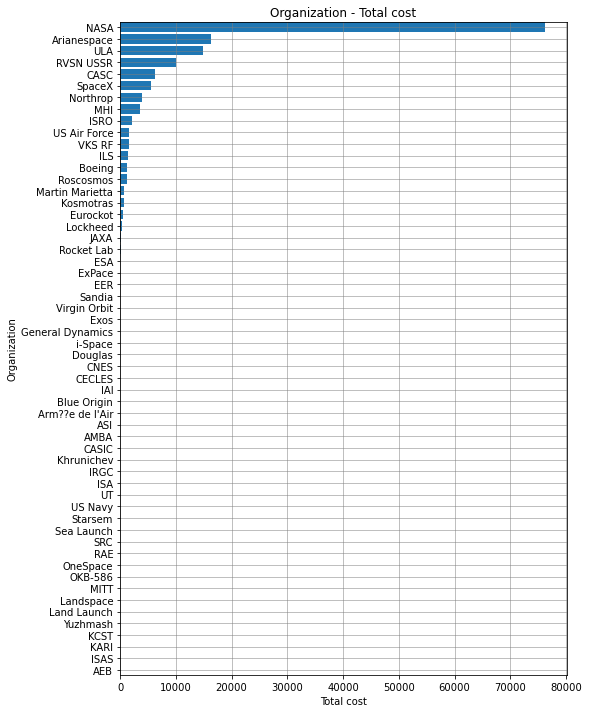

In [98]:
fig, ax = plt.subplots(figsize=(8,12))                             # stretch the plot
ax.barh(series_cost.index, series_cost.values, orientation='horizontal') # hor.bar chart
ax.grid(color='gray', linestyle='-', linewidth=0.5)                # add grid

plt.title('Organization - Total cost')                         # plot title

plt.xlabel('Total cost')                                       # x title
plt.ylabel('Organization')                                         # y title

plt.margins(y=0)                                                   # avoid extra space at top and bottom

plt.savefig("cost.png", facecolor='white', transparent=False, bbox_inches = 'tight') # save plot (do this before show plot)

plt.show()                                                         # show plot

# Analyse the Amount of Money Spent by Organisation per Launch
<a id="Money_by_Organisation_per_Launch"></a>

In [99]:
series1 = df.groupby('Organisation')['Price'].sum()
print(type(series1))
series1

<class 'pandas.core.series.Series'>


Organisation
AEB                     0.00
AMBA                    0.00
ASI                     0.00
Arianespace        16,345.00
Arm??e de l'Air         0.00
Blue Origin             0.00
Boeing              1,241.00
CASC                6,310.51
CASIC                   0.00
CECLES                  0.00
CNES                    0.00
Douglas                 0.00
EER                    20.00
ESA                    37.00
Eurockot              543.40
ExPace                 28.30
Exos                    0.00
General Dynamics        0.00
IAI                     0.00
ILS                 1,320.00
IRGC                    0.00
ISA                     0.00
ISAS                    0.00
ISRO                2,177.00
JAXA                  168.00
KARI                    0.00
KCST                    0.00
Khrunichev              0.00
Kosmotras             638.00
Land Launch             0.00
Landspace               0.00
Lockheed              280.00
MHI                 3,532.50
MITT                    0.00
M

In [100]:
series2 = df['Organisation'].value_counts()
print(type(series2))
series2

<class 'pandas.core.series.Series'>


RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 250
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


In [101]:
series_cost_per_launch = series1.div(series2).sort_values()
print(type(series_cost_per_launch))
series_cost_per_launch

<class 'pandas.core.series.Series'>


AEB                  0.00
ISAS                 0.00
KARI                 0.00
KCST                 0.00
Yuzhmash             0.00
Land Launch          0.00
Landspace            0.00
MITT                 0.00
OKB-586              0.00
OneSpace             0.00
RAE                  0.00
SRC                  0.00
Sea Launch           0.00
Starsem              0.00
US Navy              0.00
UT                   0.00
ISA                  0.00
IRGC                 0.00
Khrunichev           0.00
CASIC                0.00
AMBA                 0.00
ASI                  0.00
Arm??e de l'Air      0.00
Blue Origin          0.00
IAI                  0.00
CECLES               0.00
CNES                 0.00
Douglas              0.00
i-Space              0.00
General Dynamics     0.00
Exos                 0.00
ExPace               2.83
ESA                  2.85
Lockheed             3.54
RVSN USSR            5.63
Martin Marietta      6.33
Rocket Lab           7.50
VKS RF               7.71
Boeing      

In [102]:
#ILS
1320/46

28.695652173913043

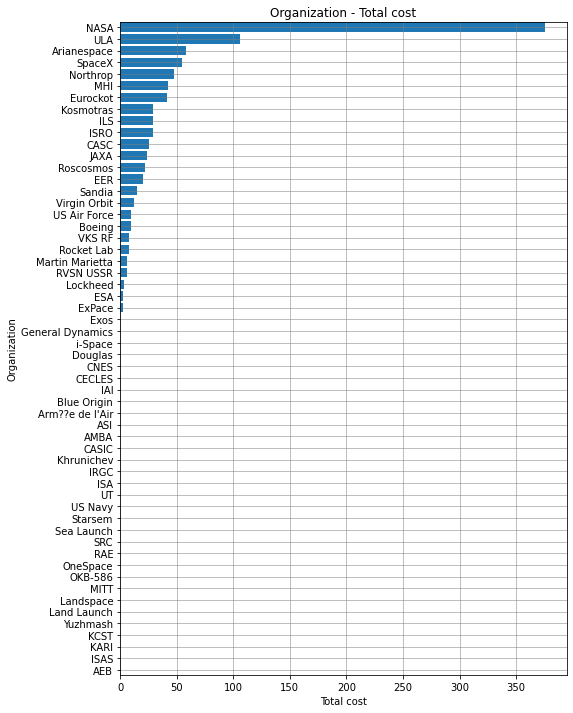

In [103]:
fig, ax = plt.subplots(figsize=(8,12))                             # stretch the plot
ax.barh(series_cost_per_launch.index, series_cost_per_launch.values, orientation='horizontal') # hor.bar chart
ax.grid(color='gray', linestyle='-', linewidth=0.5)                # add grid

plt.title('Organization - Total cost')                         # plot title

plt.xlabel('Total cost')                                       # x title
plt.ylabel('Organization')                                         # y title

plt.margins(y=0)                                                   # avoid extra space at top and bottom

plt.savefig("cost_per_launch.png", facecolor='white', transparent=False, bbox_inches = 'tight') # save plot (do this before show plot)

plt.show()                                                         # show plot

# Chart the Number of Launches per Year
<a id="Launches_per_Year"></a>

In [227]:
df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive  50.00   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive   0.00   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive  65.00   
4                       Atlas V 541 | Perseverance   StatusActive 145.00   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired   0.00   
4320                           Juno I | Explorer 1  StatusRetired   0.00   
4321                       Vanguard | Vanguard TV3  StatusRetired   0.00   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired   0.00   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired   0.00   

     Mission_Status country        cty-org  
0           Success     USA     USA-SpaceX  
1           Success     CHN       CHN-CASC  
2           Success     USA     USA-SpaceX  
3           Success     KAZ  KAZ-Roscosmos  
4           Success     USA        USA-ULA  
...             ...     ...            ...  
4319        Failure     USA    USA-US Navy  
4320        Success     USA       USA-AMBA  
4321        Failure     USA    USA-US Navy  
4322        Success     KAZ  KAZ-RVSN USSR  
4323        Success     KAZ  KAZ-RVSN USSR  

[4323 rows x 9 columns]

In [230]:
s = df['Date'][0]

In [232]:
print(type(s), s)

<class 'str'> Fri Aug 07, 2020 05:12 UTC


In [234]:
lst = s.split(' ')
lst
lst[3]

'2020'

In [235]:
year = [s.split(' ')[3] for s in df['Date']]
year

['2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 

In [236]:
df['year'] = year
df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive  50.00   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive   0.00   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive  65.00   
4                       Atlas V 541 | Perseverance   StatusActive 145.00   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired   0.00   
4320                           Juno I | Explorer 1  StatusRetired   0.00   
4321                       Vanguard | Vanguard TV3  StatusRetired   0.00   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired   0.00   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired   0.00   

     Mission_Status country        cty-org  year  
0           Success     USA     USA-SpaceX  2020  
1           Success     CHN       CHN-CASC  2020  
2           Success     USA     USA-SpaceX  2020  
3           Success     KAZ  KAZ-Roscosmos  2020  
4           Success     USA        USA-ULA  2020  
...             ...     ...            ...   ...  
4319        Failure     USA    USA-US Navy  1958  
4320        Success     USA       USA-AMBA  1958  
4321        Failure     USA    USA-US Navy  1957  
4322        Success     KAZ  KAZ-RVSN USSR  1957  
4323        Success     KAZ  KAZ-RVSN USSR  1957  

[4323 rows x 10 columns]

In [240]:
series = df['year'].value_counts().sort_index()
series

1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: year, Length: 64, dtype: int64

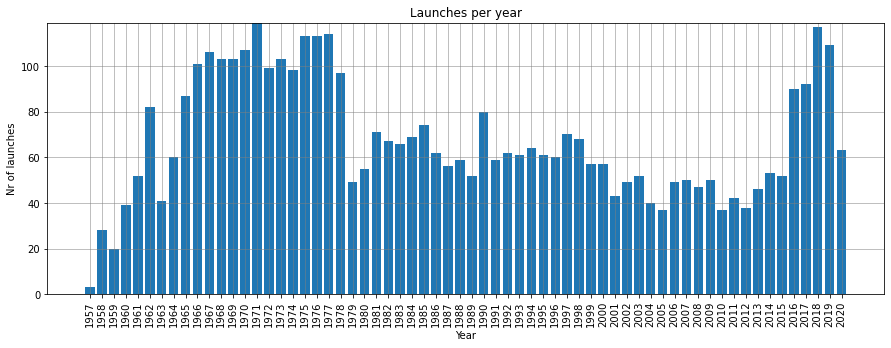

In [248]:
fig, ax = plt.subplots(figsize=(15,5))                             # stretch the plot: width:15, height:5
ax.bar(series.index, series.values) 
ax.grid(color='gray', linestyle='-', linewidth=0.5)                # add grid

plt.title('Launches per year')                                     # plot title

plt.xlabel('Year')                                                 # x title
plt.ylabel('Nr of launches')                                       # y title

plt.xticks(rotation = 90)                                          # Rotates X-Axis Ticks by 45-degrees

plt.margins(y=0)                                                   # avoid extra space at top and bottom

plt.savefig("images/launches_per_year.png", facecolor='white', transparent=False, bbox_inches = 'tight') # save plot (do this before show plot)

plt.show()                                                         # show plot

# Chart the Number of Launches Month-on-Month until the Present
<a id="Launches_Month-on-Month"></a>

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [249]:
df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive  50.00   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive   0.00   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive  65.00   
4                       Atlas V 541 | Perseverance   StatusActive 145.00   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired   0.00   
4320                           Juno I | Explorer 1  StatusRetired   0.00   
4321                       Vanguard | Vanguard TV3  StatusRetired   0.00   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired   0.00   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired   0.00   

     Mission_Status country        cty-org  year  
0           Success     USA     USA-SpaceX  2020  
1           Success     CHN       CHN-CASC  2020  
2           Success     USA     USA-SpaceX  2020  
3           Success     KAZ  KAZ-Roscosmos  2020  
4           Success     USA        USA-ULA  2020  
...             ...     ...            ...   ...  
4319        Failure     USA    USA-US Navy  1958  
4320        Success     USA       USA-AMBA  1958  
4321        Failure     USA    USA-US Navy  1957  
4322        Success     KAZ  KAZ-RVSN USSR  1957  
4323        Success     KAZ  KAZ-RVSN USSR  1957  

[4323 rows x 10 columns]

In [251]:
s=df['Date'][0]
s

'Fri Aug 07, 2020 05:12 UTC'

In [253]:
lst = s.split(' ')
lst

['Fri', 'Aug', '07,', '2020', '05:12', 'UTC']

In [254]:
lst[3]+"-"+lst[1]

'2020-Aug'

In [257]:
def convert_month(name):
    if name == "Jan":
        return "01"
    if name == "Feb":
        return "02"
    if name == "Mar":
        return "03"
    if name == "Apr":
        return "04"
    if name == "May":
        return "05"
    if name == "Jun":
        return "06"
    if name == "Jul":
        return "07"
    if name == "Aug":
        return "08"
    if name == "Sep":
        return "09"
    if name == "Oct":
        return "10"
    if name == "Nov":
        return "11"
    if name == "Dec":
        return "12"
    return "???"

In [258]:
lst[3]+"-"+convert_month(lst[1])

'2020-08'

In [259]:
year_month = [s.split(' ')[3]+"-"+convert_month(s.split(' ')[1]) for s in df['Date']]
year_month

['2020-08',
 '2020-08',
 '2020-08',
 '2020-07',
 '2020-07',
 '2020-07',
 '2020-07',
 '2020-07',
 '2020-07',
 '2020-07',
 '2020-07',
 '2020-07',
 '2020-07',
 '2020-07',
 '2020-07',
 '2020-07',
 '2020-07',
 '2020-06',
 '2020-06',
 '2020-06',
 '2020-06',
 '2020-06',
 '2020-06',
 '2020-06',
 '2020-05',
 '2020-05',
 '2020-05',
 '2020-05',
 '2020-05',
 '2020-05',
 '2020-05',
 '2020-05',
 '2020-05',
 '2020-04',
 '2020-04',
 '2020-04',
 '2020-04',
 '2020-04',
 '2020-03',
 '2020-03',
 '2020-03',
 '2020-03',
 '2020-03',
 '2020-03',
 '2020-03',
 '2020-03',
 '2020-02',
 '2020-02',
 '2020-02',
 '2020-02',
 '2020-02',
 '2020-02',
 '2020-02',
 '2020-02',
 '2020-02',
 '2020-01',
 '2020-01',
 '2020-01',
 '2020-01',
 '2020-01',
 '2020-01',
 '2020-01',
 '2020-01',
 '2019-12',
 '2019-12',
 '2019-12',
 '2019-12',
 '2019-12',
 '2019-12',
 '2019-12',
 '2019-12',
 '2019-12',
 '2019-12',
 '2019-12',
 '2019-12',
 '2019-12',
 '2019-12',
 '2019-12',
 '2019-12',
 '2019-11',
 '2019-11',
 '2019-11',
 '2019-11',
 '20

In [260]:
df['year_month']=year_month
df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive  50.00   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive   0.00   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive  65.00   
4                       Atlas V 541 | Perseverance   StatusActive 145.00   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired   0.00   
4320                           Juno I | Explorer 1  StatusRetired   0.00   
4321                       Vanguard | Vanguard TV3  StatusRetired   0.00   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired   0.00   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired   0.00   

     Mission_Status country        cty-org  year year_month  
0           Success     USA     USA-SpaceX  2020    2020-08  
1           Success     CHN       CHN-CASC  2020    2020-08  
2           Success     USA     USA-SpaceX  2020    2020-08  
3           Success     KAZ  KAZ-Roscosmos  2020    2020-07  
4           Success     USA        USA-ULA  2020    2020-07  
...             ...     ...            ...   ...        ...  
4319        Failure     USA    USA-US Navy  1958    1958-02  
4320        Success     USA       USA-AMBA  1958    1958-02  
4321        Failure     USA    USA-US Navy  1957    1957-12  
4322        Success     KAZ  KAZ-RVSN USSR  1957    1957-11  
4323        Success     KAZ  KAZ-RVSN USSR  1957    1957-10  

[4323 rows x 11 columns]

In [285]:
time_series = df['year_month'].value_counts().sort_index()
time_series_df = time_series.to_frame()
time_series_df

year_month
1957-10           1
1957-11           1
1957-12           1
1958-02           2
1958-03           3
...             ...
2020-04           5
2020-05           9
2020-06           7
2020-07          14
2020-08           3

[747 rows x 1 columns]

In [286]:
time_series_df['MA12'] = time_series_df['year_month'].rolling(12).mean()
time_series_df

year_month  MA12
1957-10           1   NaN
1957-11           1   NaN
1957-12           1   NaN
1958-02           2   NaN
1958-03           3   NaN
...             ...   ...
2020-04           5  9.17
2020-05           9  9.17
2020-06           7  9.17
2020-07          14  9.42
2020-08           3  8.67

[747 rows x 2 columns]

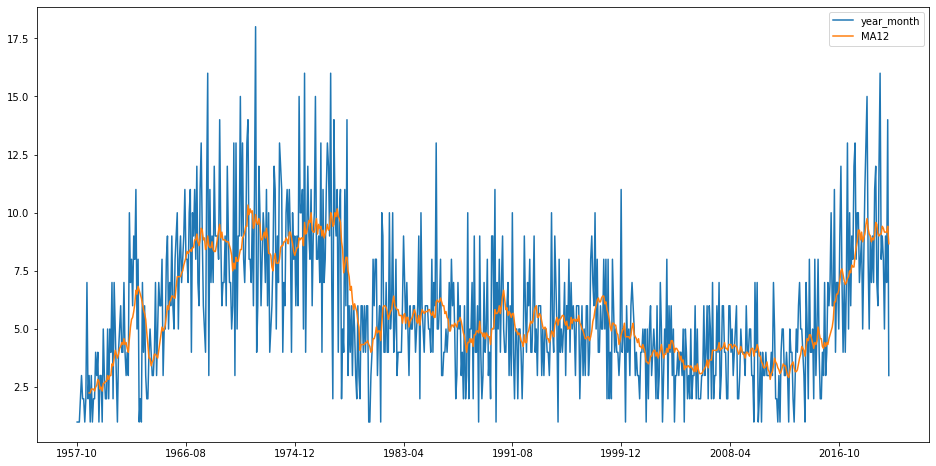

In [290]:
time_series_df[['year_month', 'MA12']].plot(label='Launches per month (with moving average)', figsize=(16, 8))
plt.savefig("images/launches_per_month3.png", facecolor='white', transparent=False, bbox_inches = 'tight') # save plot 

In [264]:
print(time_series.idxmax(), time_series.max())

1971-12 18


In [267]:
#time_series.get(key='1971-12')
time_series['1971-12']

18

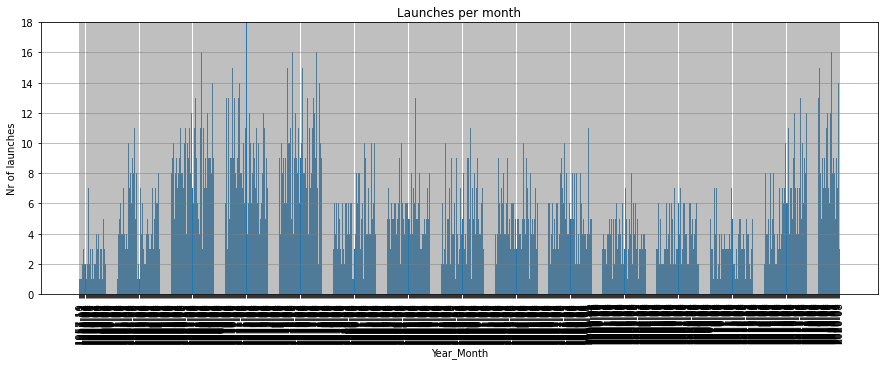

In [268]:
fig, ax = plt.subplots(figsize=(15,5))                             # stretch the plot: width:15, height:5
ax.bar(time_series.index, time_series.values) 
ax.grid(color='gray', linestyle='-', linewidth=0.5)                # add grid

plt.title('Launches per month')                                     # plot title

plt.xlabel('Year_Month')                                           # x title
plt.ylabel('Nr of launches')                                       # y title

plt.xticks(rotation = 90)                                          # Rotates X-Axis Ticks by 90-degrees

plt.margins(y=0)                                                   # avoid extra space at top and bottom

plt.savefig("images/launches_per_month.png", facecolor='white', transparent=False, bbox_inches = 'tight') # save plot (do this before show plot)

plt.show()                                                         # show plot

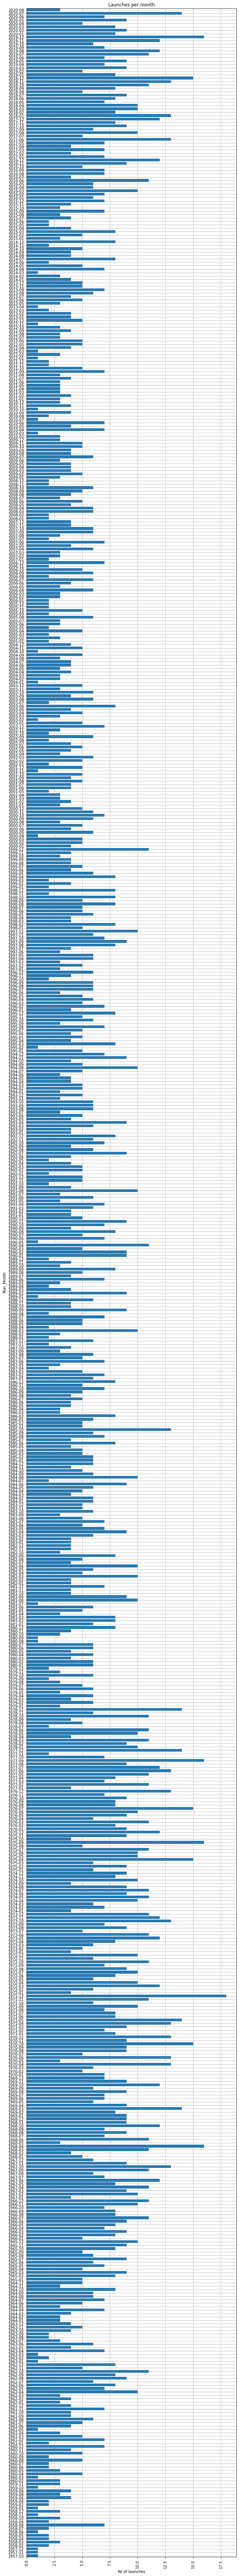

In [273]:
fig, ax = plt.subplots(figsize=(10,125))                             # stretch the plot: width:10, height:125
ax.barh(time_series.index, time_series.values) 
ax.grid(color='gray', linestyle='-', linewidth=0.5)                # add grid

plt.title('Launches per month')                                     # plot title

plt.xlabel('Nr of launches')                                       # x title
plt.ylabel('Year_Month')                                           # y title

plt.xticks(rotation = 90)                                          # Rotates X-Axis Ticks by 90-degrees

plt.margins(y=0)                                                   # avoid extra space at top and bottom

plt.savefig("images/launches_per_month2.png", facecolor='white', transparent=False, bbox_inches = 'tight') # save plot (do this before show plot)

plt.show()  

# Launches per Month: Which months are most popular and least popular for launches?
<a id="popular_for_launches"></a>
Some months have better weather than others. Which time of year seems to be best for space missions?

In [274]:
df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive  50.00   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive   0.00   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive  65.00   
4                       Atlas V 541 | Perseverance   StatusActive 145.00   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired   0.00   
4320                           Juno I | Explorer 1  StatusRetired   0.00   
4321                       Vanguard | Vanguard TV3  StatusRetired   0.00   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired   0.00   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired   0.00   

     Mission_Status country        cty-org  year year_month  
0           Success     USA     USA-SpaceX  2020    2020-08  
1           Success     CHN       CHN-CASC  2020    2020-08  
2           Success     USA     USA-SpaceX  2020    2020-08  
3           Success     KAZ  KAZ-Roscosmos  2020    2020-07  
4           Success     USA        USA-ULA  2020    2020-07  
...             ...     ...            ...   ...        ...  
4319        Failure     USA    USA-US Navy  1958    1958-02  
4320        Success     USA       USA-AMBA  1958    1958-02  
4321        Failure     USA    USA-US Navy  1957    1957-12  
4322        Success     KAZ  KAZ-RVSN USSR  1957    1957-11  
4323        Success     KAZ  KAZ-RVSN USSR  1957    1957-10  

[4323 rows x 11 columns]

In [277]:
month = [convert_month(s.split(' ')[1]) for s in df['Date']]
df['month'] = month
df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive  50.00   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive   0.00   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive  65.00   
4                       Atlas V 541 | Perseverance   StatusActive 145.00   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired   0.00   
4320                           Juno I | Explorer 1  StatusRetired   0.00   
4321                       Vanguard | Vanguard TV3  StatusRetired   0.00   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired   0.00   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired   0.00   

     Mission_Status country        cty-org  year year_month month  
0           Success     USA     USA-SpaceX  2020    2020-08    08  
1           Success     CHN       CHN-CASC  2020    2020-08    08  
2           Success     USA     USA-SpaceX  2020    2020-08    08  
3           Success     KAZ  KAZ-Roscosmos  2020    2020-07    07  
4           Success     USA        USA-ULA  2020    2020-07    07  
...             ...     ...            ...   ...        ...   ...  
4319        Failure     USA    USA-US Navy  1958    1958-02    02  
4320        Success     USA       USA-AMBA  1958    1958-02    02  
4321        Failure     USA    USA-US Navy  1957    1957-12    12  
4322        Success     KAZ  KAZ-RVSN USSR  1957    1957-11    11  
4323        Success     KAZ  KAZ-RVSN USSR  1957    1957-10    10  

[4323 rows x 12 columns]

In [280]:
series = df['month'].value_counts().sort_index()
series

01    268
02    336
03    353
04    383
05    326
06    402
07    351
08    373
09    365
10    381
11    335
12    450
Name: month, dtype: int64

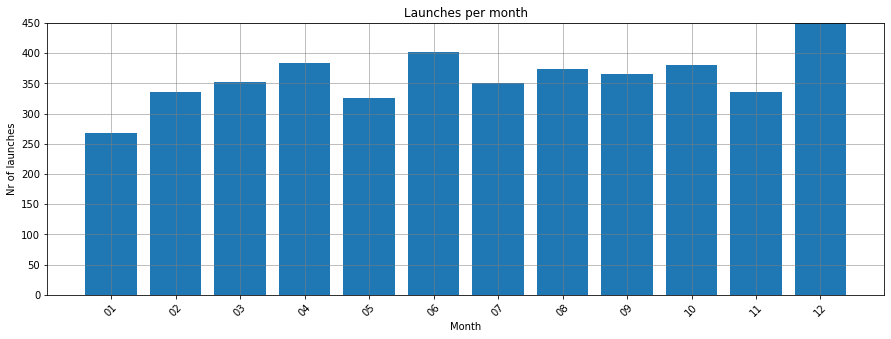

In [282]:
fig, ax = plt.subplots(figsize=(15,5))                             # stretch the plot: width:15, height:5
ax.bar(series.index, series.values) 
ax.grid(color='gray', linestyle='-', linewidth=0.5)                # add grid

plt.title('Launches per month')                                     # plot title

plt.xlabel('Month')                                           # x title
plt.ylabel('Nr of launches')                                       # y title

plt.xticks(rotation = 45)                                          # Rotates X-Axis Ticks by 45-degrees

plt.margins(y=0)                                                   # avoid extra space at top and bottom

plt.savefig("images/launches_per_month2.png", facecolor='white', transparent=False, bbox_inches = 'tight') # save plot (do this before show plot)

plt.show()                                                         # show plot

# How has the Launch Price varied Over Time? 
<a id="Price_Over_Time"></a>
Create a line chart that shows the average price of rocket launches over time. 

In [291]:
df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive  50.00   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive   0.00   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive  65.00   
4                       Atlas V 541 | Perseverance   StatusActive 145.00   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired   0.00   
4320                           Juno I | Explorer 1  StatusRetired   0.00   
4321                       Vanguard | Vanguard TV3  StatusRetired   0.00   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired   0.00   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired   0.00   

     Mission_Status country        cty-org  year year_month month  
0           Success     USA     USA-SpaceX  2020    2020-08    08  
1           Success     CHN       CHN-CASC  2020    2020-08    08  
2           Success     USA     USA-SpaceX  2020    2020-08    08  
3           Success     KAZ  KAZ-Roscosmos  2020    2020-07    07  
4           Success     USA        USA-ULA  2020    2020-07    07  
...             ...     ...            ...   ...        ...   ...  
4319        Failure     USA    USA-US Navy  1958    1958-02    02  
4320        Success     USA       USA-AMBA  1958    1958-02    02  
4321        Failure     USA    USA-US Navy  1957    1957-12    12  
4322        Success     KAZ  KAZ-RVSN USSR  1957    1957-11    11  
4323        Success     KAZ  KAZ-RVSN USSR  1957    1957-10    10  

[4323 rows x 12 columns]

In [294]:
df_cost = df[df['Price'] > 0]
df_cost

Organisation                                           Location  \
0           SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1             CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
3        Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4              ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
5             CASC       LC-9, Taiyuan Satellite Launch Center, China   
...            ...                                                ...   
3855  US Air Force            SLC-4W, Vandenberg AFB, California, USA   
3971  US Air Force           SLC-20, Cape Canaveral AFS, Florida, USA   
3993  US Air Force           SLC-20, Cape Canaveral AFS, Florida, USA   
4000  US Air Force           SLC-20, Cape Canaveral AFS, Florida, USA   
4020  US Air Force           SLC-20, Cape Canaveral AFS, Florida, USA   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
5     Sat Jul 25, 2020 03:13 UTC   
...                          ...   
3855  Fri Jul 29, 1966 18:43 UTC   
3971  Thu May 06, 1965 15:00 UTC   
3993  Thu Feb 11, 1965 15:19 UTC   
4000  Thu Dec 10, 1964 16:52 UTC   
4020  Tue Sep 01, 1964 15:00 UTC   

                                                 Detail  Rocket_Status  Price  \
0          Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive  50.00   
1                   Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
3          Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive  65.00   
4                            Atlas V 541 | Perseverance   StatusActive 145.00   
5     Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...   StatusActive  64.68   
...                                                 ...            ...    ...   
3855                                  Titan IIIB | KH-8  StatusRetired  59.00   
3971                         Titan IIIA | LES 2 & LCS 1  StatusRetired  63.23   
3993                                 Titan IIIA | LES 1  StatusRetired  63.23   
4000                           Titan IIIA | Transtage 2  StatusRetired  63.23   
4020                           Titan IIIA | Transtage 1  StatusRetired  63.23   

     Mission_Status country           cty-org  year year_month month  
0           Success     USA        USA-SpaceX  2020    2020-08    08  
1           Success     CHN          CHN-CASC  2020    2020-08    08  
3           Success     KAZ     KAZ-Roscosmos  2020    2020-07    07  
4           Success     USA           USA-ULA  2020    2020-07    07  
5           Success     CHN          CHN-CASC  2020    2020-07    07  
...             ...     ...               ...   ...        ...   ...  
3855        Success     USA  USA-US Air Force  1966    1966-07    07  
3971        Success     USA  USA-US Air Force  1965    1965-05    05  
3993        Success     USA  USA-US Air Force  1965    1965-02    02  
4000        Success     USA  USA-US Air Force  1964    1964-12    12  
4020        Failure     USA  USA-US Air Force  1964    1964-09    09  

[963 rows x 12 columns]

In [452]:
series = df_cost.groupby('year')['Price'].mean()
series

year
1964      63.23
1965      63.23
1966      59.00
1967     196.62
1968     279.20
1969     609.50
1970   1,160.00
1971   1,160.00
1972   1,160.00
1973   1,160.00
1981     450.00
1982     345.20
1983     366.16
1984     380.13
1985     408.08
1986     310.27
1987   1,687.20
1988   1,193.16
1989     380.83
1990     289.15
1991     391.43
1992     319.35
1993     276.73
1994     221.51
1995     325.00
1996     243.20
1997     221.74
1998     152.12
1999     128.51
2000     173.12
2001     290.70
2002     185.59
2003      80.51
2004      92.74
2005      95.79
2006     138.61
2007     125.70
2008     133.45
2009     180.29
2010     148.40
2011     146.60
2012     122.29
2013      90.55
2014     102.55
2015      91.55
2016      79.46
2017      69.49
2018      64.75
2019      59.61
2020      56.65
Name: Price, dtype: float64

In [453]:
series.values

array([  63.23      ,   63.23      ,   59.        ,  196.625     ,
        279.2       ,  609.5       , 1160.        , 1160.        ,
       1160.        , 1160.        ,  450.        ,  345.2       ,
        366.16      ,  380.13333333,  408.08      ,  310.26666667,
       1687.2       , 1193.16      ,  380.83333333,  289.14545455,
        391.42857143,  319.34583333,  276.73333333,  221.509375  ,
        325.        ,  243.19642857,  221.73888889,  152.12222222,
        128.51142857,  173.11875   ,  290.7       ,  185.58588235,
         80.5115    ,   92.73588235,   95.79333333,  138.60592593,
        125.69517241,  133.45185185,  180.28709677,  148.4       ,
        146.59655172,  122.292     ,   90.55151515,  102.55121951,
         91.54871795,   79.45734375,   69.49106061,   64.74977273,
         59.60972603,   56.65019231])

In [305]:
series.index

Index(['1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020'],
      dtype='object', name='year')

In [454]:
type(df_cost.groupby('year')['Price'].mean())

pandas.core.series.Series

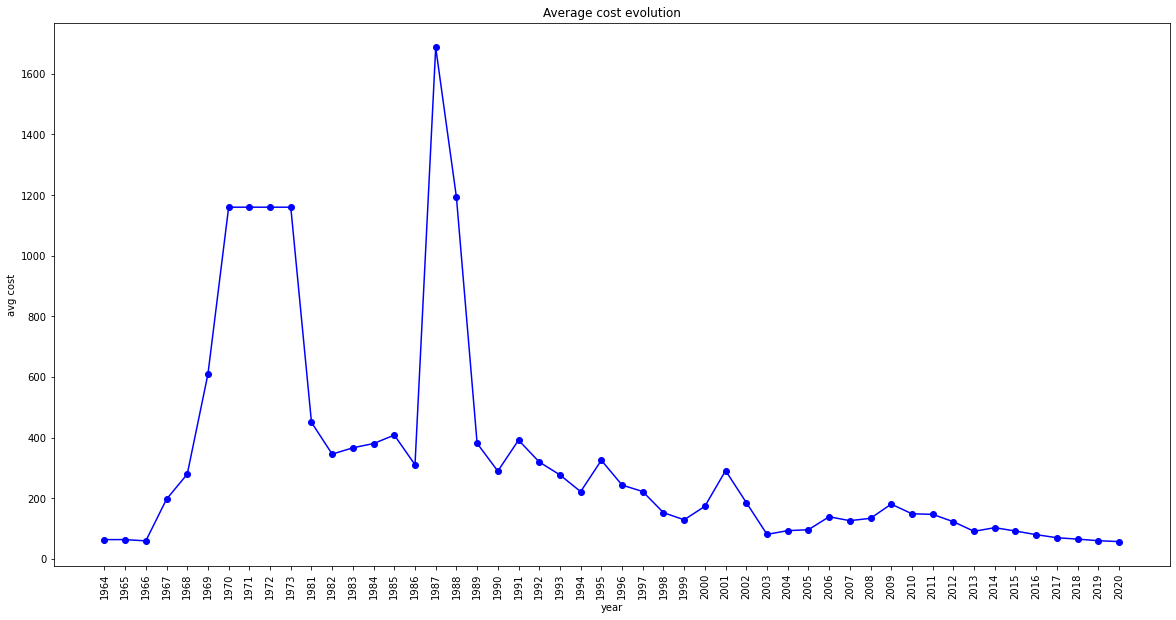

In [455]:
x_axis = series.index
y_axis = series.values

#plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.figure(figsize=(20,10))
# plt.plot(x_axis, y_axis)
plt.plot(x_axis, y_axis, color='blue', marker='o')
plt.title('Average cost evolution')
plt.xlabel('year')
plt.ylabel('avg cost')
plt.xticks(rotation=90)
plt.savefig("images/cost_evolution.png", facecolor='white', transparent=False, bbox_inches = 'tight')
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 
<a id="Launches_Top10"></a>
How has the dominance of launches changed over time between the different players? 

In [314]:
df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive  50.00   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive   0.00   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive  65.00   
4                       Atlas V 541 | Perseverance   StatusActive 145.00   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired   0.00   
4320                           Juno I | Explorer 1  StatusRetired   0.00   
4321                       Vanguard | Vanguard TV3  StatusRetired   0.00   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired   0.00   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired   0.00   

     Mission_Status country        cty-org  year year_month month  
0           Success     USA     USA-SpaceX  2020    2020-08    08  
1           Success     CHN       CHN-CASC  2020    2020-08    08  
2           Success     USA     USA-SpaceX  2020    2020-08    08  
3           Success     KAZ  KAZ-Roscosmos  2020    2020-07    07  
4           Success     USA        USA-ULA  2020    2020-07    07  
...             ...     ...            ...   ...        ...   ...  
4319        Failure     USA    USA-US Navy  1958    1958-02    02  
4320        Success     USA       USA-AMBA  1958    1958-02    02  
4321        Failure     USA    USA-US Navy  1957    1957-12    12  
4322        Success     KAZ  KAZ-RVSN USSR  1957    1957-11    11  
4323        Success     KAZ  KAZ-RVSN USSR  1957    1957-10    10  

[4323 rows x 12 columns]

In [333]:
series2 = df.groupby('Organisation')['Date'].count().sort_values(ascending=False)

In [334]:
type(series2)

pandas.core.series.Series

In [336]:
series = series2[:10]
series

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 250
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: Date, dtype: int64

In [340]:
top10 = list(series.index)
top10

['RVSN USSR',
 'Arianespace',
 'General Dynamics',
 'CASC',
 'NASA',
 'VKS RF',
 'US Air Force',
 'ULA',
 'Boeing',
 'Martin Marietta']

In [345]:
df_top10 = df[df['Organisation'].isin(top10)]
df_top10

Organisation                                           Location  \
1             CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
4              ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
5             CASC       LC-9, Taiyuan Satellite Launch Center, China   
7             CASC    LC-101, Wenchang Satellite Launch Center, China   
12            CASC       LC-3, Xichang Satellite Launch Center, China   
...            ...                                                ...   
4307  US Air Force          SLC-17A, Cape Canaveral AFS, Florida, USA   
4313     RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4315     RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4322     RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323     RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
1     Thu Aug 06, 2020 04:01 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
5     Sat Jul 25, 2020 03:13 UTC   
7     Thu Jul 23, 2020 04:41 UTC   
12    Thu Jul 09, 2020 12:11 UTC   
...                          ...   
4307  Sun Aug 17, 1958 12:18 UTC   
4313  Thu May 15, 1958 07:12 UTC   
4315  Sun Apr 27, 1958 09:01 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                                 Detail  Rocket_Status  Price  \
1                   Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
4                            Atlas V 541 | Perseverance   StatusActive 145.00   
5     Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...   StatusActive  64.68   
7                              Long March 5 | Tianwen-1   StatusActive   0.00   
12                          Long March 3B/E | Apstar-6D   StatusActive  29.15   
...                                                 ...            ...    ...   
4307                      Thor-DM 18 Able I | Pioneer 0  StatusRetired   0.00   
4313                        Sputnik 8A91 | Sputnik-3 #2  StatusRetired   0.00   
4315                        Sputnik 8A91 | Sputnik-3 #1  StatusRetired   0.00   
4322                         Sputnik 8K71PS | Sputnik-2  StatusRetired   0.00   
4323                         Sputnik 8K71PS | Sputnik-1  StatusRetired   0.00   

     Mission_Status country           cty-org  year year_month month  
1           Success     CHN          CHN-CASC  2020    2020-08    08  
4           Success     USA           USA-ULA  2020    2020-07    07  
5           Success     CHN          CHN-CASC  2020    2020-07    07  
7           Success     CHN          CHN-CASC  2020    2020-07    07  
12          Success     CHN          CHN-CASC  2020    2020-07    07  
...             ...     ...               ...   ...        ...   ...  
4307        Failure     USA  USA-US Air Force  1958    1958-08    08  
4313        Success     KAZ     KAZ-RVSN USSR  1958    1958-05    05  
4315        Failure     KAZ     KAZ-RVSN USSR  1958    1958-04    04  
4322        Success     KAZ     KAZ-RVSN USSR  1957    1957-11    11  
4323        Success     KAZ     KAZ-RVSN USSR  1957    1957-10    10  

[3512 rows x 12 columns]

In [363]:
year_start = int(df_top10['year'].min())
year_end = int(df_top10['year'].max())
print(year_start, year_end)

1957 2020


In [381]:
dic_of_series = {}
for org in top10:
    dic_of_series[org] = df_top10[df_top10['Organisation'] == org].groupby('year')['Date'].count()
print(dic_of_series)

{'RVSN USSR': year
1957     2
1958     5
1959     4
1960     9
1961     9
1962    22
1963    24
1964    36
1965    53
1966    51
1967    74
1968    79
1969    82
1970    87
1971    93
1972    79
1973    84
1974    83
1975    89
1976    95
1977    97
1978    71
1979    36
1980    40
1981    51
1982    53
1983    46
1984    42
1985    51
1986    49
1987    42
1988    36
1989    26
1990    37
1991    28
1992     9
1995     1
1996     1
1998     1
Name: Date, dtype: int64, 'Arianespace': year
1984     3
1985     4
1986     3
1987     2
1988     6
1989     7
1990     6
1991     8
1992     7
1993     7
1994     8
1995    11
1996    10
1997    11
1998    10
1999    10
2000    12
2001     8
2002    12
2003     4
2004     3
2005     5
2006     5
2007     6
2008     6
2009     7
2010     6
2011     7
2012     9
2013     7
2014    11
2015    12
2016    11
2017    11
2018    11
2019     9
2020     4
Name: Date, dtype: int64, 'General Dynamics': year
1959     1
1960     5
1961     8
1962    14
1963

In [395]:
df_top10[(df_top10['Organisation'] == 'Arianespace') & (df_top10['year'] == '1984')]

Organisation                                           Location  \
2167  Arianespace  ELA-1, Guiana Space Centre, French Guiana, France   
2187  Arianespace  ELA-1, Guiana Space Centre, French Guiana, France   
2203  Arianespace  ELV-1 (SLV), Guiana Space Centre, French Guian...   

                            Date                                Detail  \
2167  Sat Nov 10, 1984 01:14 UTC       Ariane 3 | Spacenet 2, MARECS-2   
2187  Sat Aug 04, 1984 13:32 UTC  Ariane 3 | Eutelsat-1 F2, Telecom 1A   
2203  Wed May 23, 1984 01:33 UTC                Ariane 1 | Spacenet F1   

      Rocket_Status  Price Mission_Status country          cty-org  year  \
2167  StatusRetired   0.00        Success     FRA  FRA-Arianespace  1984   
2187  StatusRetired   0.00        Success     FRA  FRA-Arianespace  1984   
2203  StatusRetired   0.00        Success     FRA  FRA-Arianespace  1984   

     year_month month  
2167    1984-11    11  
2187    1984-08    08  
2203    1984-05    05

In [416]:
#some orgs have no rows for certain years => foresee 0 as nr of launches for missing years
dic = {}

for org in top10:
    print(org)
    series = pd.Series(lst_values, index =lst_index)
    lst_values = []
    lst_index = []
    for i in range(year_start, year_end + 1):
        lst_values.append(0)
        lst_index.append(str(i))
    dic[org]=series
    for index, value in dic_of_series[org].items():   # with missing years     
        print(index, value)
        dic[org].loc[index] = value
    print(org, '\n', "target", dic[org])
    print("========================================================")


RVSN USSR
1957 2
1958 5
1959 4
1960 9
1961 9
1962 22
1963 24
1964 36
1965 53
1966 51
1967 74
1968 79
1969 82
1970 87
1971 93
1972 79
1973 84
1974 83
1975 89
1976 95
1977 97
1978 71
1979 36
1980 40
1981 51
1982 53
1983 46
1984 42
1985 51
1986 49
1987 42
1988 36
1989 26
1990 37
1991 28
1992 9
1995 1
1996 1
1998 1
RVSN USSR 
 target 1957    2
1958    5
1959    4
1960    9
1961    9
       ..
2016    0
2017    0
2018    0
2019    0
2020    0
Length: 64, dtype: int64
Arianespace
1984 3
1985 4
1986 3
1987 2
1988 6
1989 7
1990 6
1991 8
1992 7
1993 7
1994 8
1995 11
1996 10
1997 11
1998 10
1999 10
2000 12
2001 8
2002 12
2003 4
2004 3
2005 5
2006 5
2007 6
2008 6
2009 7
2010 6
2011 7
2012 9
2013 7
2014 11
2015 12
2016 11
2017 11
2018 11
2019 9
2020 4
Arianespace 
 target 1957     0
1958     0
1959     0
1960     0
1961     0
        ..
2016    11
2017    11
2018    11
2019     9
2020     4
Length: 64, dtype: int64
General Dynamics
1959 1
1960 5
1961 8
1962 14
1963 9
1964 18
1965 19
1966 33
1967 1

In [417]:
print(dic['RVSN USSR'].index)
print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
print(dic['RVSN USSR'].values)

Index(['1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020'],
      dtype='object')
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
[ 2  5  4  9  9 22 24 36 53 51 74 79 82 87 93 79 84 83 89 95 97 71 36 40
 51 53 46 42 51 49 42 36 26 37 28  9  0  0  1  1  0  1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


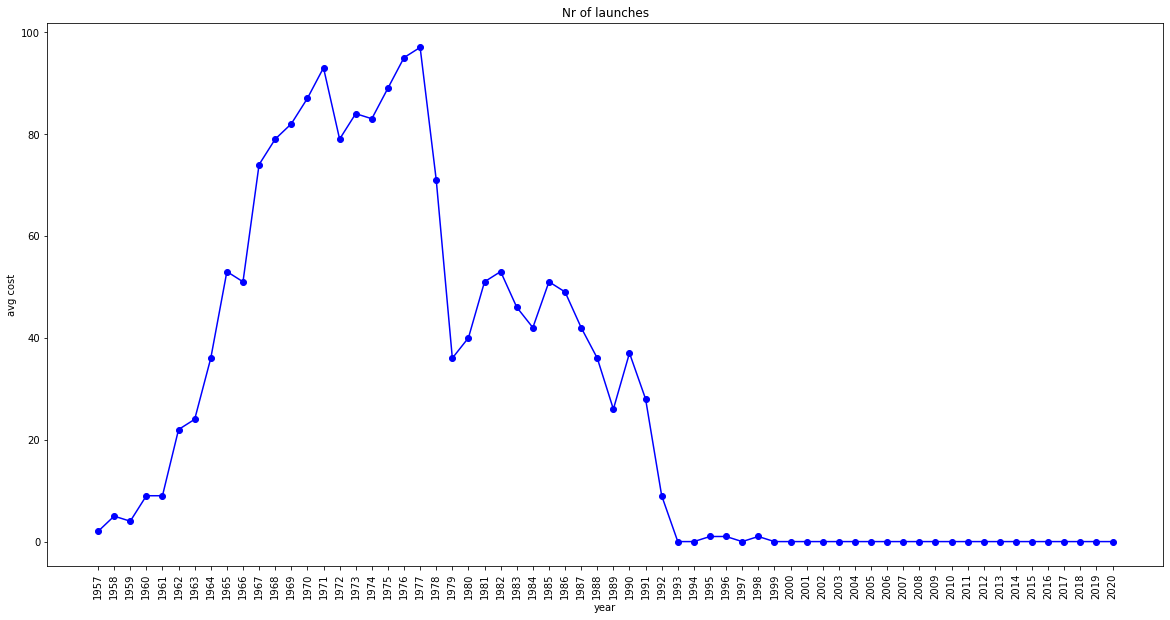

In [450]:
x_axis = dic['RVSN USSR'].index
y_axis = dic['RVSN USSR'].values

#plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.figure(figsize=(20,10))
# plt.plot(x_axis, y_axis)
plt.plot(x_axis, y_axis, color='blue', marker='o')
plt.title('Nr of launches')
plt.xlabel('year')
plt.ylabel('avg cost')
plt.xticks(rotation=90)
plt.savefig("images/nr_of_launches_RVSNUSSR.png", facecolor='white', transparent=False, bbox_inches = 'tight')
plt.show()

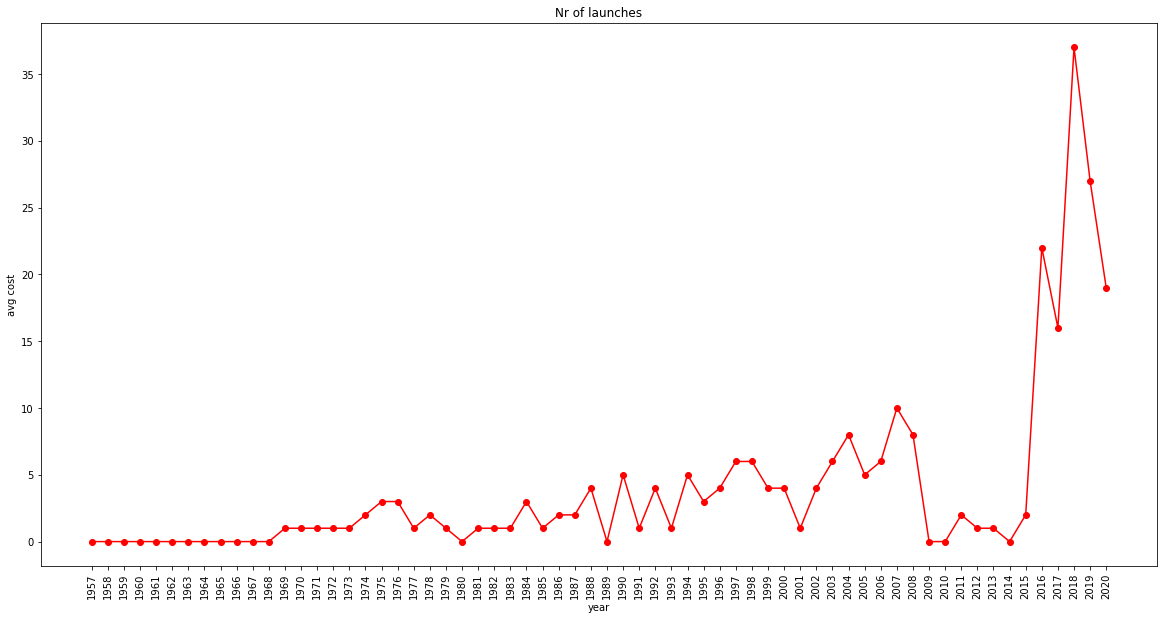

In [449]:
x_axis = dic['CASC'].index
y_axis = dic['CASC'].values

#plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.figure(figsize=(20,10))
# plt.plot(x_axis, y_axis)
plt.plot(x_axis, y_axis, color='red', marker='o')
plt.title('Nr of launches')
plt.xlabel('year')
plt.ylabel('avg cost')
plt.xticks(rotation=90)
plt.savefig("images/nr_of_launches_CASC.png", facecolor='white', transparent=False, bbox_inches = 'tight')
plt.show()

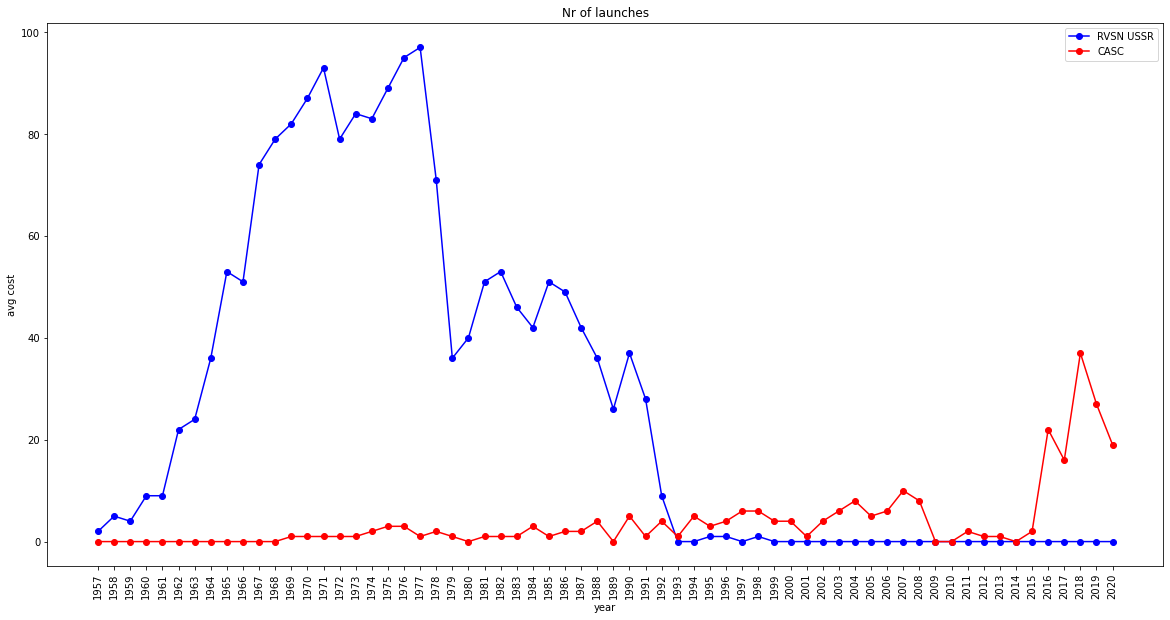

In [448]:
#plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.figure(figsize=(20,10))

# plt.plot(x_axis, y_axis)
x_axis = dic['RVSN USSR'].index
y_axis = dic['RVSN USSR'].values
plt.plot(x_axis, y_axis, color='blue', marker='o', label='RVSN USSR')

# plt.plot(x_axis, y_axis)
x_axis = dic['CASC'].index
y_axis = dic['CASC'].values
plt.plot(x_axis, y_axis, color='red', marker='o', label='CASC')

plt.title('Nr of launches')
plt.xlabel('year')
plt.ylabel('avg cost')
plt.xticks(rotation=90)
plt.legend()

plt.savefig("images/nr_of_launches_RVSNUSSR_CASC.png", facecolor='white', transparent=False, bbox_inches = 'tight')
plt.show()

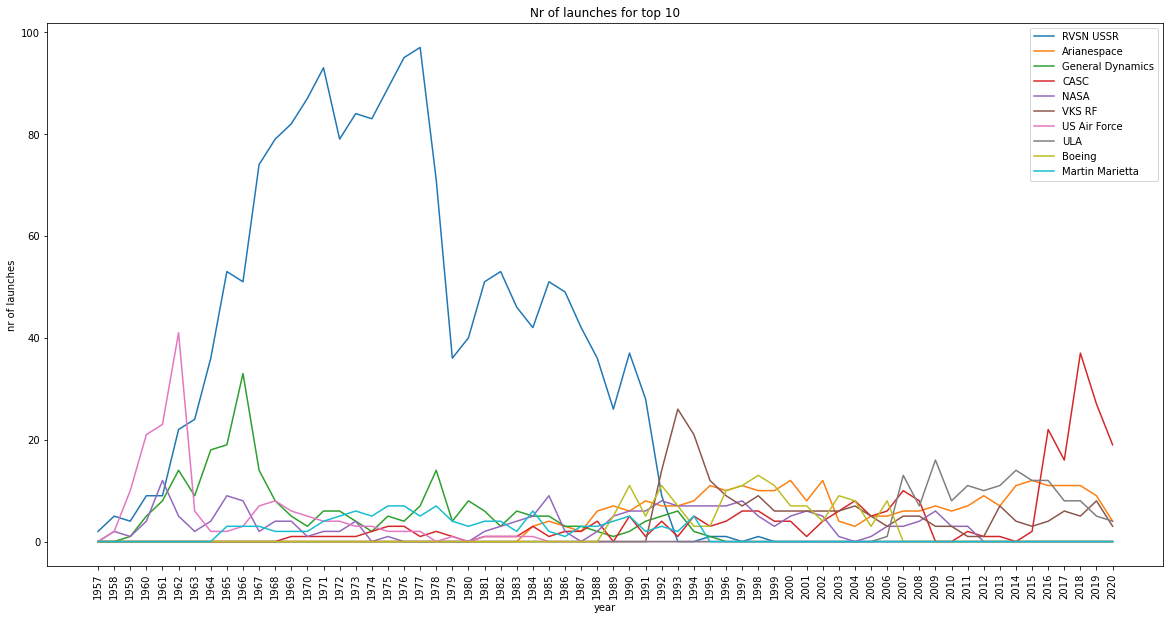

In [447]:
# make a line chart with multiple lines
#plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.figure(figsize=(20,10))

for org, series in dic_of_series.items():
    x = dic[org].index
    y = dic[org].values
    plt.plot(x, y, label = org)
# plt.plot(x_axis, y_axis)
# plt.plot(x_axis, y_axis, color='blue', marker='o')
plt.title('Nr of launches for top 10')
plt.xlabel('year')
plt.ylabel('nr of launches')
plt.xticks(rotation=90)
plt.legend()
plt.savefig("images/top10_nr_of_launches.png", facecolor='white', transparent=False, bbox_inches = 'tight')
plt.show()

In [324]:
df.iloc[3708] # search by index

Organisation                                 US Air Force
Location          SLC-4W, Vandenberg AFB, California, USA
Date                           Tue Dec 05, 1967 18:45 UTC
Detail                              Titan IIIB | OPS 5000
Rocket_Status                               StatusRetired
Price                                               59.00
Mission_Status                                    Success
country                                               USA
cty-org                                  USA-US Air Force
year                                                 1967
year_month                                        1967-12
month                                                  12
Name: 3709, dtype: object

In [432]:
df.iloc[3602] # search by index

Organisation                                            NASA
Location          LC-39A, Kennedy Space Center, Florida, USA
Date                              Sat Dec 21, 1968 12:51 UTC
Detail                                   Saturn V | Apollo 8
Rocket_Status                                  StatusRetired
Price                                               1,160.00
Mission_Status                                       Success
country                                                  USA
cty-org                                             USA-NASA
year                                                    1968
year_month                                           1968-12
month                                                     12
Name: 3603, dtype: object

In [433]:
series = df_cost.groupby(['year', 'Organisation'])['Price'].mean()
series

year  Organisation
1964  US Air Force      63.23
1965  US Air Force      63.23
1966  US Air Force      59.00
1967  NASA           1,160.00
      US Air Force      59.00
                       ...   
2020  Roscosmos         52.62
      SpaceX            50.00
      ULA              133.25
      VKS RF            48.50
      Virgin Orbit      12.00
Name: Price, Length: 268, dtype: float64

In [327]:
type(series)

pandas.core.series.Series

# Cold War Space Race: USA vs USSR
<a id="Cold_War"></a>
The cold war lasted from the start of the dataset up until 1991. 

In [434]:
df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive  50.00   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive   0.00   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive  65.00   
4                       Atlas V 541 | Perseverance   StatusActive 145.00   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired   0.00   
4320                           Juno I | Explorer 1  StatusRetired   0.00   
4321                       Vanguard | Vanguard TV3  StatusRetired   0.00   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired   0.00   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired   0.00   

     Mission_Status country        cty-org  year year_month month  
0           Success     USA     USA-SpaceX  2020    2020-08    08  
1           Success     CHN       CHN-CASC  2020    2020-08    08  
2           Success     USA     USA-SpaceX  2020    2020-08    08  
3           Success     KAZ  KAZ-Roscosmos  2020    2020-07    07  
4           Success     USA        USA-ULA  2020    2020-07    07  
...             ...     ...            ...   ...        ...   ...  
4319        Failure     USA    USA-US Navy  1958    1958-02    02  
4320        Success     USA       USA-AMBA  1958    1958-02    02  
4321        Failure     USA    USA-US Navy  1957    1957-12    12  
4322        Success     KAZ  KAZ-RVSN USSR  1957    1957-11    11  
4323        Success     KAZ  KAZ-RVSN USSR  1957    1957-10    10  

[4323 rows x 12 columns]

In [436]:
df['country'].value_counts()

RUS    1398
USA    1387
KAZ     701
FRA     303
CHN     268
JPN     126
IND      76
IRN      14
NZL      13
ISR      11
KEN       9
AUS       6
PRK       5
KOR       3
BRA       3
Name: country, dtype: int64

In [440]:
df_USA = df[df['country'] == "USA"]
df_USA

Organisation                                       Location  \
0          SpaceX     LC-39A, Kennedy Space Center, Florida, USA   
2          SpaceX                  Pad A, Boca Chica, Texas, USA   
4             ULA       SLC-41, Cape Canaveral AFS, Florida, USA   
8          SpaceX       SLC-40, Cape Canaveral AFS, Florida, USA   
10       Northrop  LP-0B, Wallops Flight Facility, Virginia, USA   
...           ...                                            ...   
4317      US Navy       LC-18A, Cape Canaveral AFS, Florida, USA   
4318         AMBA       LC-26A, Cape Canaveral AFS, Florida, USA   
4319      US Navy       LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA       LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy       LC-18A, Cape Canaveral AFS, Florida, USA   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
8     Mon Jul 20, 2020 21:30 UTC   
10    Wed Jul 15, 2020 13:46 UTC   
...                          ...   
4317  Mon Mar 17, 1958 12:15 UTC   
4318  Wed Mar 05, 1958 18:27 UTC   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive  50.00   
2               Starship Prototype | 150 Meter Hop   StatusActive   0.00   
4                       Atlas V 541 | Perseverance   StatusActive 145.00   
8                     Falcon 9 Block 5 | ANASIS-II   StatusActive  50.00   
10                          Minotaur IV | NROL-129   StatusActive  46.00   
...                                            ...            ...    ...   
4317                         Vanguard | Vanguard 1  StatusRetired   0.00   
4318                           Juno I | Explorer 2  StatusRetired   0.00   
4319                     Vanguard | Vanguard TV3BU  StatusRetired   0.00   
4320                           Juno I | Explorer 1  StatusRetired   0.00   
4321                       Vanguard | Vanguard TV3  StatusRetired   0.00   

     Mission_Status country       cty-org  year year_month month  
0           Success     USA    USA-SpaceX  2020    2020-08    08  
2           Success     USA    USA-SpaceX  2020    2020-08    08  
4           Success     USA       USA-ULA  2020    2020-07    07  
8           Success     USA    USA-SpaceX  2020    2020-07    07  
10          Success     USA  USA-Northrop  2020    2020-07    07  
...             ...     ...           ...   ...        ...   ...  
4317        Success     USA   USA-US Navy  1958    1958-03    03  
4318        Failure     USA      USA-AMBA  1958    1958-03    03  
4319        Failure     USA   USA-US Navy  1958    1958-02    02  
4320        Success     USA      USA-AMBA  1958    1958-02    02  
4321        Failure     USA   USA-US Navy  1957    1957-12    12  

[1387 rows x 12 columns]

In [441]:
df_RUS_KAZ = df[df['country'].isin(["RUS", "KAZ"])]
df_RUS_KAZ

Organisation                                      Location  \
3       Roscosmos  Site 200/39, Baikonur Cosmodrome, Kazakhstan   
6       Roscosmos    Site 31/6, Baikonur Cosmodrome, Kazakhstan   
28         VKS RF        Site 43/4, Plesetsk Cosmodrome, Russia   
33      Roscosmos    Site 31/6, Baikonur Cosmodrome, Kazakhstan   
37      Roscosmos    Site 31/6, Baikonur Cosmodrome, Kazakhstan   
...           ...                                           ...   
4301    RVSN USSR     Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4313    RVSN USSR     Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4315    RVSN USSR     Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4322    RVSN USSR     Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR     Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
3     Thu Jul 30, 2020 21:25 UTC   
6     Thu Jul 23, 2020 14:26 UTC   
28    Fri May 22, 2020 07:31 UTC   
33    Sat Apr 25, 2020 01:51 UTC   
37    Thu Apr 09, 2020 08:05 UTC   
...                          ...   
4301  Tue Sep 23, 1958 07:40 UTC   
4313  Thu May 15, 1958 07:12 UTC   
4315  Sun Apr 27, 1958 09:01 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive  65.00   
6                      Soyuz 2.1a | Progress MS-15   StatusActive  48.50   
28               Soyuz 2.1b/Fregat-M | Cosmos 2546   StatusActive   0.00   
33                     Soyuz 2.1a | Progress MS-14   StatusActive  48.50   
37                        Soyuz 2.1a | Soyuz MS-16   StatusActive  48.50   
...                                            ...            ...    ...   
4301                    Vostok | E-1 n†­1 (Luna-1)  StatusRetired   0.00   
4313                   Sputnik 8A91 | Sputnik-3 #2  StatusRetired   0.00   
4315                   Sputnik 8A91 | Sputnik-3 #1  StatusRetired   0.00   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired   0.00   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired   0.00   

     Mission_Status country        cty-org  year year_month month  
3           Success     KAZ  KAZ-Roscosmos  2020    2020-07    07  
6           Success     KAZ  KAZ-Roscosmos  2020    2020-07    07  
28          Success     RUS     RUS-VKS RF  2020    2020-05    05  
33          Success     KAZ  KAZ-Roscosmos  2020    2020-04    04  
37          Success     KAZ  KAZ-Roscosmos  2020    2020-04    04  
...             ...     ...            ...   ...        ...   ...  
4301        Failure     KAZ  KAZ-RVSN USSR  1958    1958-09    09  
4313        Success     KAZ  KAZ-RVSN USSR  1958    1958-05    05  
4315        Failure     KAZ  KAZ-RVSN USSR  1958    1958-04    04  
4322        Success     KAZ  KAZ-RVSN USSR  1957    1957-11    11  
4323        Success     KAZ  KAZ-RVSN USSR  1957    1957-10    10  

[2099 rows x 12 columns]

In [471]:
series_USA = df_USA.groupby('year')['Date'].count()
series_USA 

year
1957     1
1958    23
1959    16
1960    30
1961    43
        ..
2016    27
2017    30
2018    34
2019    27
2020    21
Name: Date, Length: 64, dtype: int64

In [444]:
series_RUS_KAZ = df_RUS_KAZ.groupby('year')['Date'].count()
series_RUS_KAZ

year
1957     2
1958     5
1959     4
1960     9
1961     9
        ..
2016    17
2017    19
2018    17
2019    22
2020     9
Name: Date, Length: 64, dtype: int64

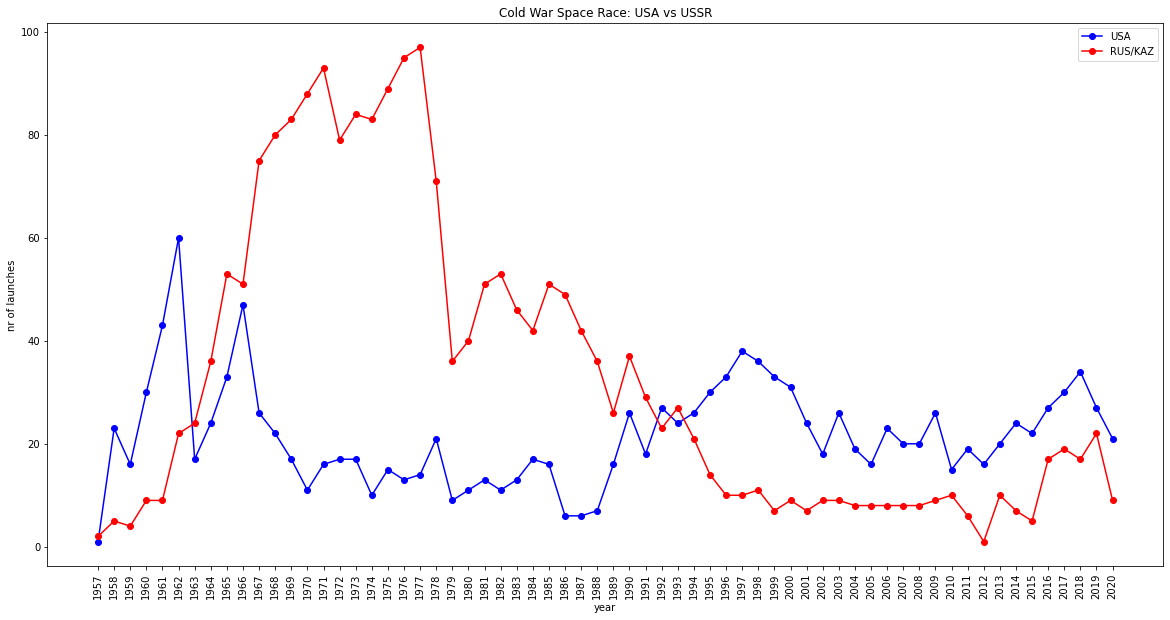

In [446]:
#plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.figure(figsize=(20,10))

# plt.plot(x_axis, y_axis)
x_axis = series_USA.index
y_axis = series_USA.values
plt.plot(x_axis, y_axis, color='blue', marker='o', label='USA')

# plt.plot(x_axis, y_axis)
x_axis = series_RUS_KAZ.index
y_axis = series_RUS_KAZ.values
plt.plot(x_axis, y_axis, color='red', marker='o', label='RUS/KAZ')

plt.title('Cold War Space Race: USA vs USSR')
plt.xlabel('year')
plt.ylabel('nr of launches')
plt.xticks(rotation=90)
plt.legend()

plt.savefig("images/cold_war.png", facecolor='white', transparent=False, bbox_inches = 'tight')
plt.show()

# Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA
<a id="Pie_Chart"></a>
Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [475]:
series_USA = df_USA.groupby('year')['Date'].count()
series_USA

year
1957     1
1958    23
1959    16
1960    30
1961    43
        ..
2016    27
2017    30
2018    34
2019    27
2020    21
Name: Date, Length: 64, dtype: int64

In [476]:
series_RUS_KAZ = df_RUS_KAZ.groupby('year')['country'].count()
series_RUS_KAZ

year
1957     2
1958     5
1959     4
1960     9
1961     9
        ..
2016    17
2017    19
2018    17
2019    22
2020     9
Name: country, Length: 64, dtype: int64

In [460]:
nr_USA = series_USA.sum()
nr_USA

1387

In [461]:
nr_RUS_KAZ = series_RUS_KAZ.sum()
nr_RUS_KAZ

2099

In [478]:
df_cold_war = pd.concat([series_USA, series_RUS_KAZ], axis=1)
df_cold_war.rename(columns={"Date": "USA", "country": "RUS_KAZ"}, inplace=True)
df_cold_war

USA  RUS_KAZ
year              
1957    1        2
1958   23        5
1959   16        4
1960   30        9
1961   43        9
...   ...      ...
2016   27       17
2017   30       19
2018   34       17
2019   27       22
2020   21        9

[64 rows x 2 columns]

In [481]:
import plotly.express as px
data = [nr_USA, nr_RUS_KAZ]
cols = ['USA', 'RUS_KAZ']
fig = px.pie(values=data, names=cols, title='USA vs RUS_KAZ')
fig.show()


## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers
<a id="Superpowers"></a>

In [482]:
series_USA

year
1957     1
1958    23
1959    16
1960    30
1961    43
        ..
2016    27
2017    30
2018    34
2019    27
2020    21
Name: Date, Length: 64, dtype: int64

In [483]:
series_RUS_KAZ

year
1957     2
1958     5
1959     4
1960     9
1961     9
        ..
2016    17
2017    19
2018    17
2019    22
2020     9
Name: country, Length: 64, dtype: int64

In [484]:
series_USA.index.tolist()

['1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [486]:
series_USA.tolist()

[1,
 23,
 16,
 30,
 43,
 60,
 17,
 24,
 33,
 47,
 26,
 22,
 17,
 11,
 16,
 17,
 17,
 10,
 15,
 13,
 14,
 21,
 9,
 11,
 13,
 11,
 13,
 17,
 16,
 6,
 6,
 7,
 16,
 26,
 18,
 27,
 24,
 26,
 30,
 33,
 38,
 36,
 33,
 31,
 24,
 18,
 26,
 19,
 16,
 23,
 20,
 20,
 26,
 15,
 19,
 16,
 20,
 24,
 22,
 27,
 30,
 34,
 27,
 21]

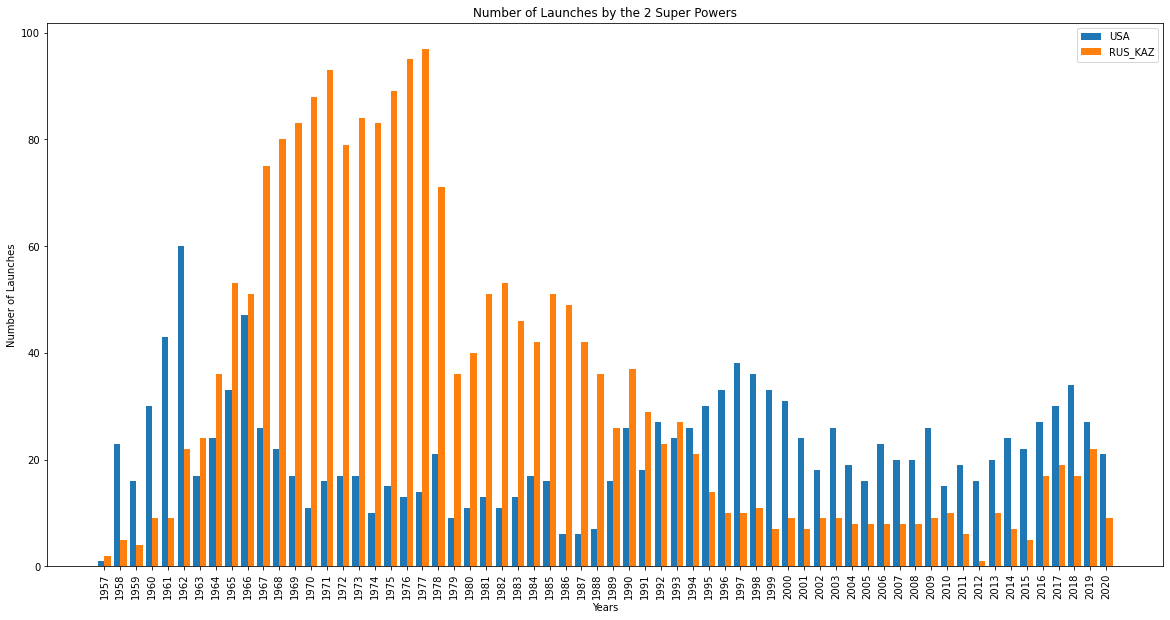

In [489]:
#plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.figure(figsize=(20,10))

X = series_USA.index.tolist()
USA = series_USA.tolist()
RUS_KAZ = series_RUS_KAZ.tolist()
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, USA, 0.4, label = 'USA')
plt.bar(X_axis + 0.2, RUS_KAZ, 0.4, label = 'RUS_KAZ')
  
plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Number of Launches")
plt.title("Number of Launches by the 2 Super Powers")
plt.legend()
plt.xticks(rotation=90)
plt.savefig("images/super_powers.png", facecolor='white', transparent=False, bbox_inches = 'tight')
plt.show()

## Chart the Total Number of Mission Failures Year on Year.
<a id="Failures_Year_on_Year"></a>

In [490]:
df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive  50.00   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive   0.00   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive  65.00   
4                       Atlas V 541 | Perseverance   StatusActive 145.00   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired   0.00   
4320                           Juno I | Explorer 1  StatusRetired   0.00   
4321                       Vanguard | Vanguard TV3  StatusRetired   0.00   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired   0.00   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired   0.00   

     Mission_Status country        cty-org  year year_month month  
0           Success     USA     USA-SpaceX  2020    2020-08    08  
1           Success     CHN       CHN-CASC  2020    2020-08    08  
2           Success     USA     USA-SpaceX  2020    2020-08    08  
3           Success     KAZ  KAZ-Roscosmos  2020    2020-07    07  
4           Success     USA        USA-ULA  2020    2020-07    07  
...             ...     ...            ...   ...        ...   ...  
4319        Failure     USA    USA-US Navy  1958    1958-02    02  
4320        Success     USA       USA-AMBA  1958    1958-02    02  
4321        Failure     USA    USA-US Navy  1957    1957-12    12  
4322        Success     KAZ  KAZ-RVSN USSR  1957    1957-11    11  
4323        Success     KAZ  KAZ-RVSN USSR  1957    1957-10    10  

[4323 rows x 12 columns]

In [491]:
df_failures = df[df['Mission_Status'] != 'Success']
df_failures

Organisation                                           Location  \
11          ExPace    Site 95, Jiuquan Satellite Launch Center, China   
15      Rocket Lab    Rocket Lab LC-1A, M?hia Peninsula, New Zealand   
27    Virgin Orbit  Cosmic Girl, Mojave Air and Space Port, Califo...   
36            CASC       LC-2, Xichang Satellite Launch Center, China   
43            CASC    LC-201, Wenchang Satellite Launch Center, China   
...            ...                                                ...   
4314       US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4315     RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4318          AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4319       US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4321       US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   

                            Date                                       Detail  \
11    Fri Jul 10, 2020 04:17 UTC   Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2   
15    Sat Jul 04, 2020 21:19 UTC  Electron/Curie | Pics Or It Didn??¦t Happen   
27    Mon May 25, 2020 19:50 UTC                    LauncherOne | Demo Flight   
36    Thu Apr 09, 2020 11:46 UTC              Long March 3B/E | Nusantara Dua   
43    Mon Mar 16, 2020 13:34 UTC                        Long March 7A | XJY-6   
...                          ...                                          ...   
4314  Mon Apr 28, 1958 02:53 UTC                      Vanguard | Vanguard TV5   
4315  Sun Apr 27, 1958 09:01 UTC                  Sputnik 8A91 | Sputnik-3 #1   
4318  Wed Mar 05, 1958 18:27 UTC                          Juno I | Explorer 2   
4319  Wed Feb 05, 1958 07:33 UTC                    Vanguard | Vanguard TV3BU   
4321  Fri Dec 06, 1957 16:44 UTC                      Vanguard | Vanguard TV3   

      Rocket_Status  Price Mission_Status country           cty-org  year  \
11     StatusActive  28.30        Failure     CHN        CHN-ExPace  2020   
15     StatusActive   7.50        Failure     NZL    NZL-Rocket Lab  2020   
27     StatusActive  12.00        Failure     USA  USA-Virgin Orbit  2020   
36     StatusActive  29.15        Failure     CHN          CHN-CASC  2020   
43     StatusActive   0.00        Failure     CHN          CHN-CASC  2020   
...             ...    ...            ...     ...               ...   ...   
4314  StatusRetired   0.00        Failure     USA       USA-US Navy  1958   
4315  StatusRetired   0.00        Failure     KAZ     KAZ-RVSN USSR  1958   
4318  StatusRetired   0.00        Failure     USA          USA-AMBA  1958   
4319  StatusRetired   0.00        Failure     USA       USA-US Navy  1958   
4321  StatusRetired   0.00        Failure     USA       USA-US Navy  1957   

     year_month month  
11      2020-07    07  
15      2020-07    07  
27      2020-05    05  
36      2020-04    04  
43      2020-03    03  
...         ...   ...  
4314    1958-04    04  
4315    1958-04    04  
4318    1958-03    03  
4319    1958-02    02  
4321    1957-12    12  

[445 rows x 12 columns]

In [495]:
ser_failures = df_failures.groupby('year')['Date'].count()
ser_failures

year
1957     1
1958    22
1959    12
1960    20
1961    20
        ..
2016     4
2017     8
2018     4
2019     9
2020     6
Name: Date, Length: 64, dtype: int64

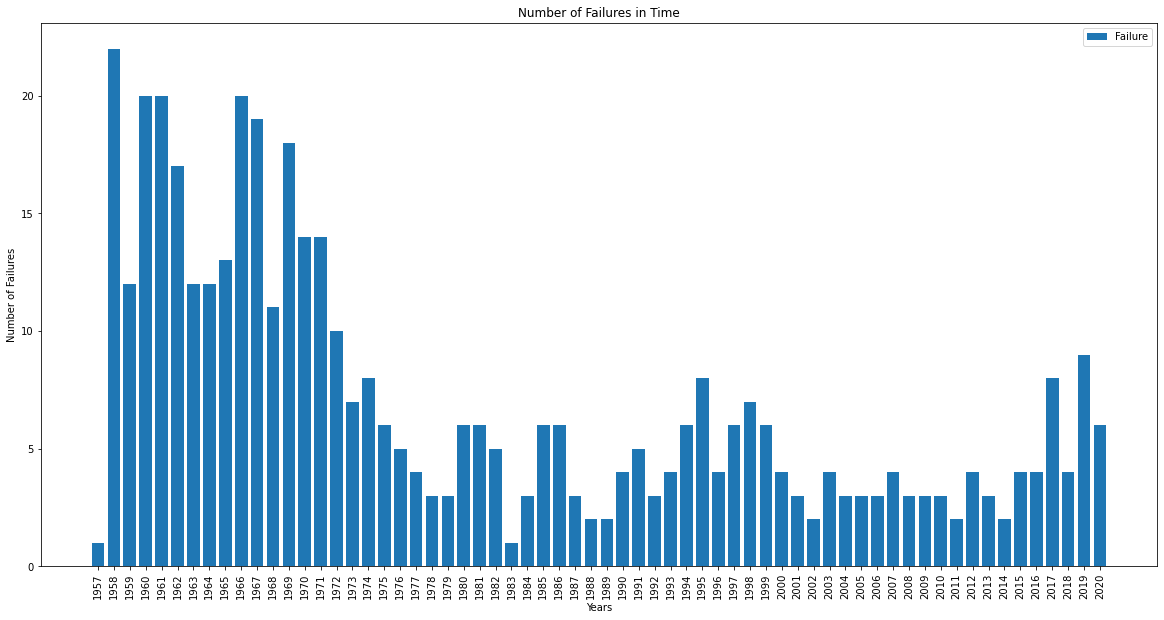

In [498]:
#plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.figure(figsize=(20,10))

x = ser_failures.index.tolist()
y = ser_failures.tolist()
  
plt.bar(x, y, label='Failure')
  
plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Number of Failures")
plt.title("Number of Failures in Time")
plt.legend()
plt.xticks(rotation=90)
plt.savefig("images/failures.png", facecolor='white', transparent=False, bbox_inches = 'tight')
plt.show()

## Chart the Percentage of Failures over Time
<a id="Percentage_Failures"></a>
Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [499]:
ser_failures

year
1957     1
1958    22
1959    12
1960    20
1961    20
        ..
2016     4
2017     8
2018     4
2019     9
2020     6
Name: Date, Length: 64, dtype: int64

In [500]:
ser_launches = df.groupby('year')['Date'].count()
ser_launches

year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Date, Length: 64, dtype: int64

In [501]:
for year in range(1957, 2021):
    print(year)

1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


In [505]:
dic = {}
for year in range(1957, 2021):
    dic[year] = round(100 * ser_failures[str(year)]/ser_launches[str(year)], 2)
print(dic)

{1957: 33.33, 1958: 78.57, 1959: 60.0, 1960: 51.28, 1961: 38.46, 1962: 20.73, 1963: 29.27, 1964: 20.0, 1965: 14.94, 1966: 19.8, 1967: 17.92, 1968: 10.68, 1969: 17.48, 1970: 13.08, 1971: 11.76, 1972: 10.1, 1973: 6.8, 1974: 8.16, 1975: 5.31, 1976: 4.42, 1977: 3.51, 1978: 3.09, 1979: 6.12, 1980: 10.91, 1981: 8.45, 1982: 7.46, 1983: 1.52, 1984: 4.35, 1985: 8.11, 1986: 9.68, 1987: 5.36, 1988: 3.39, 1989: 3.85, 1990: 5.0, 1991: 8.47, 1992: 4.84, 1993: 6.56, 1994: 9.38, 1995: 13.11, 1996: 6.67, 1997: 8.57, 1998: 10.29, 1999: 10.53, 2000: 7.02, 2001: 6.98, 2002: 4.08, 2003: 7.69, 2004: 7.5, 2005: 8.11, 2006: 6.12, 2007: 8.0, 2008: 6.38, 2009: 6.0, 2010: 8.11, 2011: 4.76, 2012: 10.53, 2013: 6.52, 2014: 3.77, 2015: 7.69, 2016: 4.44, 2017: 8.7, 2018: 3.42, 2019: 8.26, 2020: 9.52}


In [506]:
series_failure_perc = pd.Series(dic)
series_failure_perc

1957   33.33
1958   78.57
1959   60.00
1960   51.28
1961   38.46
        ... 
2016    4.44
2017    8.70
2018    3.42
2019    8.26
2020    9.52
Length: 64, dtype: float64

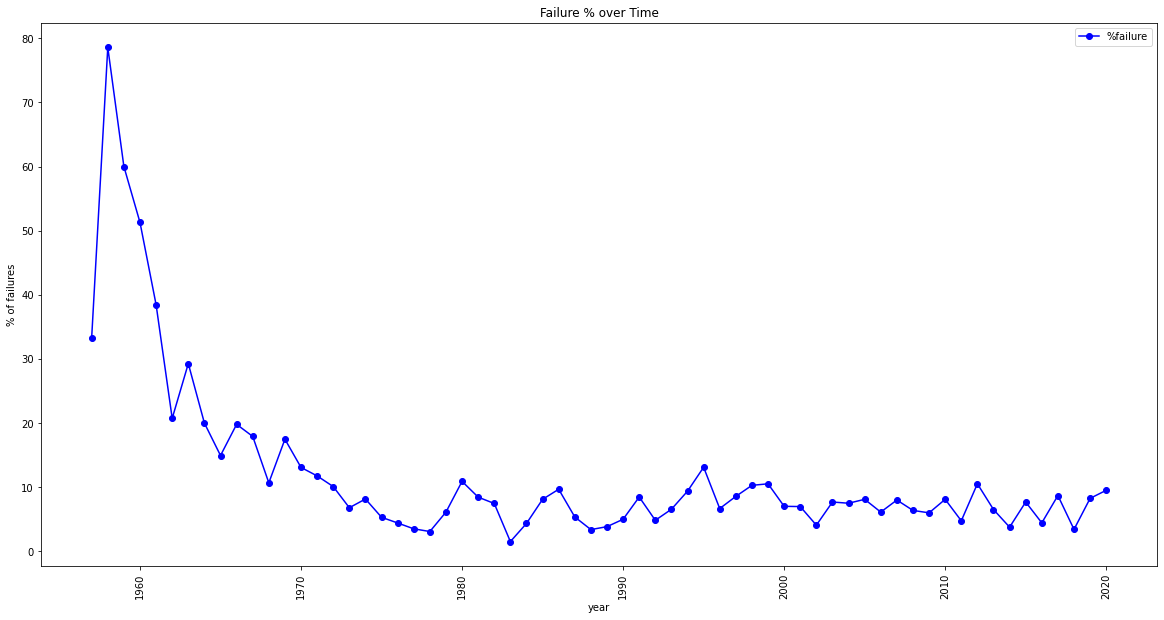

In [508]:
#plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.figure(figsize=(20,10))

# plt.plot(x_axis, y_axis)
x_axis = series_failure_perc.index
y_axis = series_failure_perc.values
plt.plot(x_axis, y_axis, color='blue', marker='o', label='%failure')

plt.title('Failure % over Time')
plt.xlabel('year')
plt.ylabel('% of failures')
plt.xticks(rotation=90)
plt.legend()

plt.savefig("images/percentage_of_failures.png", facecolor='white', transparent=False, bbox_inches = 'tight')
plt.show()

# For Every Year Show which Country was in the Lead (in terms of Total Number of Launches up to and including including 2020)
<a id="Country_Lead"></a>
Do the results change if we only look at the number of successful launches? 

In [509]:
df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive  50.00   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive   0.00   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive  65.00   
4                       Atlas V 541 | Perseverance   StatusActive 145.00   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired   0.00   
4320                           Juno I | Explorer 1  StatusRetired   0.00   
4321                       Vanguard | Vanguard TV3  StatusRetired   0.00   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired   0.00   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired   0.00   

     Mission_Status country        cty-org  year year_month month  
0           Success     USA     USA-SpaceX  2020    2020-08    08  
1           Success     CHN       CHN-CASC  2020    2020-08    08  
2           Success     USA     USA-SpaceX  2020    2020-08    08  
3           Success     KAZ  KAZ-Roscosmos  2020    2020-07    07  
4           Success     USA        USA-ULA  2020    2020-07    07  
...             ...     ...            ...   ...        ...   ...  
4319        Failure     USA    USA-US Navy  1958    1958-02    02  
4320        Success     USA       USA-AMBA  1958    1958-02    02  
4321        Failure     USA    USA-US Navy  1957    1957-12    12  
4322        Success     KAZ  KAZ-RVSN USSR  1957    1957-11    11  
4323        Success     KAZ  KAZ-RVSN USSR  1957    1957-10    10  

[4323 rows x 12 columns]

In [534]:
series = df.groupby(['year', 'country'])['Date'].count()
series

year  country
1957  KAZ         2
      USA         1
1958  KAZ         5
      USA        23
1959  KAZ         4
                 ..
2020  JPN         3
      KAZ         6
      NZL         3
      RUS         3
      USA        21
Name: Date, Length: 412, dtype: int64

In [535]:
series['1957']

country
KAZ    2
USA    1
Name: Date, dtype: int64

In [536]:
df_lead = series.reset_index()
df_lead

year country  Date
0    1957     KAZ     2
1    1957     USA     1
2    1958     KAZ     5
3    1958     USA    23
4    1959     KAZ     4
..    ...     ...   ...
407  2020     JPN     3
408  2020     KAZ     6
409  2020     NZL     3
410  2020     RUS     3
411  2020     USA    21

[412 rows x 3 columns]

In [537]:
df_lead.rename(columns={"Date": "nr_launches"}, inplace=True)
df_lead

year country  nr_launches
0    1957     KAZ            2
1    1957     USA            1
2    1958     KAZ            5
3    1958     USA           23
4    1959     KAZ            4
..    ...     ...          ...
407  2020     JPN            3
408  2020     KAZ            6
409  2020     NZL            3
410  2020     RUS            3
411  2020     USA           21

[412 rows x 3 columns]

In [540]:
lst_index = []
lst_max_launches = []
lst_cty = []
for year in range(1957, 2021):
    df_lead_yr = df_lead[df_lead['year'] == str(year)]
    ix = df_lead_yr['nr_launches'].idxmax()
    max_launches = df_lead_yr.loc[ix]['nr_launches']
    cty = df_lead_yr.loc[ix]['country']
    lst_index.append(str(year))
    lst_max_launches.append(max_launches)
    lst_cty.append(cty)
print(lst_index)
print(lst_max_launches)
print(lst_cty)


['1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
[2, 23, 16, 30, 43, 60, 17, 28, 43, 47, 38, 40, 45, 59, 62, 57, 67, 60, 66, 66, 72, 62, 33, 34, 41, 43, 40, 38, 39, 42, 30, 27, 22, 30, 25, 27, 24, 26, 30, 33, 38, 36, 33, 31, 24, 18, 26, 19, 16, 23, 20, 20, 26, 15, 19, 16, 20, 24, 22, 27, 30, 39, 34, 22]
['KAZ', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'KAZ', 'KAZ', 'USA', 'KAZ', 'KAZ', 'RUS', 'RUS', 'RUS', 'RUS', 'RUS', 'RUS', 'RUS', 'RUS', 'RUS', 'RUS', 'RUS', 'RUS', 'RUS', 'RUS', 'RUS', 'RUS', 'RUS', 'RUS', 'RUS', 'RUS', 'RUS',

In [542]:
df_lead_countries = pd.DataFrame({'country': lst_cty, 'nr_launches': lst_max_launches}, index=lst_index)
df_lead_countries

country  nr_launches
1957     KAZ            2
1958     USA           23
1959     USA           16
1960     USA           30
1961     USA           43
...      ...          ...
2016     USA           27
2017     USA           30
2018     CHN           39
2019     CHN           34
2020     CHN           22

[64 rows x 2 columns]

In [546]:
list(df_lead_countries.index)

['1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [547]:
list(df_lead_countries['nr_launches'])

[2,
 23,
 16,
 30,
 43,
 60,
 17,
 28,
 43,
 47,
 38,
 40,
 45,
 59,
 62,
 57,
 67,
 60,
 66,
 66,
 72,
 62,
 33,
 34,
 41,
 43,
 40,
 38,
 39,
 42,
 30,
 27,
 22,
 30,
 25,
 27,
 24,
 26,
 30,
 33,
 38,
 36,
 33,
 31,
 24,
 18,
 26,
 19,
 16,
 23,
 20,
 20,
 26,
 15,
 19,
 16,
 20,
 24,
 22,
 27,
 30,
 39,
 34,
 22]

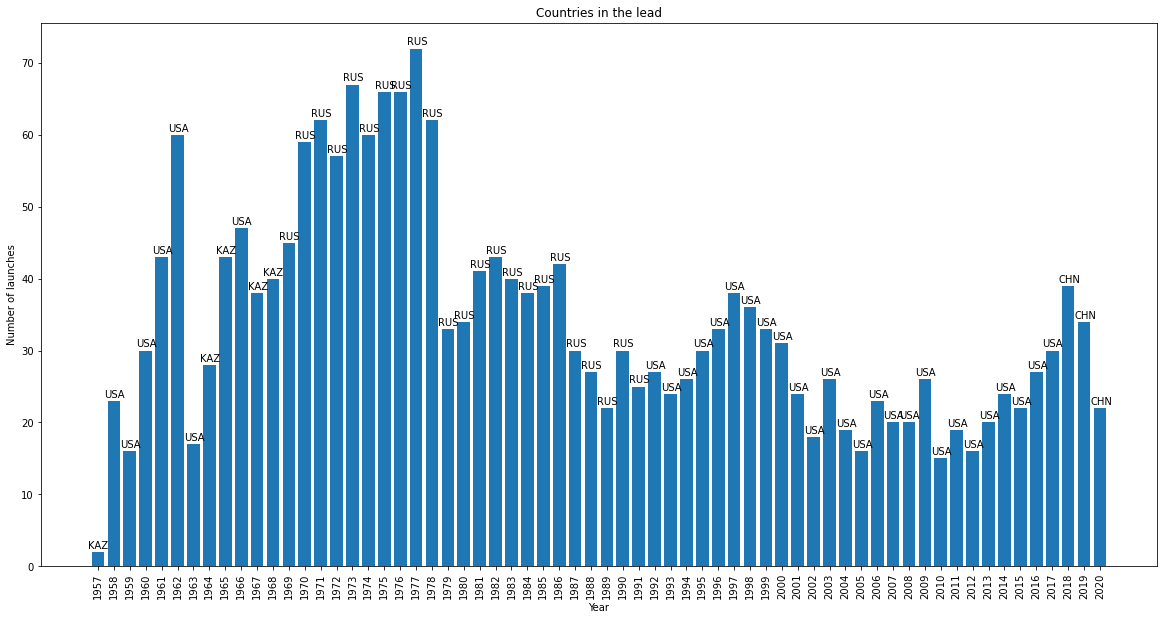

In [555]:
# function to add value labels
def addlabels(x,y,z):
    for i in range(len(x)):
        plt.text(i-0.6,y[i]+0.5,z[i])
 
# plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.figure(figsize=(20,10))

# creating data on which bar chart will be plot
x = list(df_lead_countries.index)
y = list(df_lead_countries['nr_launches'])
z = list(df_lead_countries['country'])

# making the bar chart on the data
plt.bar(x, y)

# calling the function to add value labels
addlabels(x,y,z)

# giving title to the plot
plt.title("Countries in the lead")

# giving X and Y labels
plt.xlabel("Year")
plt.ylabel("Number of launches")
plt.xticks(rotation=90)

plt.savefig("images/countries_in_the_lead.png", facecolor='white', transparent=False, bbox_inches = 'tight')

# visualizing the plot
plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches
<a id="Organisation_Lead"></a>
Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [556]:
df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive  50.00   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive   0.00   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive  65.00   
4                       Atlas V 541 | Perseverance   StatusActive 145.00   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired   0.00   
4320                           Juno I | Explorer 1  StatusRetired   0.00   
4321                       Vanguard | Vanguard TV3  StatusRetired   0.00   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired   0.00   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired   0.00   

     Mission_Status country        cty-org  year year_month month  
0           Success     USA     USA-SpaceX  2020    2020-08    08  
1           Success     CHN       CHN-CASC  2020    2020-08    08  
2           Success     USA     USA-SpaceX  2020    2020-08    08  
3           Success     KAZ  KAZ-Roscosmos  2020    2020-07    07  
4           Success     USA        USA-ULA  2020    2020-07    07  
...             ...     ...            ...   ...        ...   ...  
4319        Failure     USA    USA-US Navy  1958    1958-02    02  
4320        Success     USA       USA-AMBA  1958    1958-02    02  
4321        Failure     USA    USA-US Navy  1957    1957-12    12  
4322        Success     KAZ  KAZ-RVSN USSR  1957    1957-11    11  
4323        Success     KAZ  KAZ-RVSN USSR  1957    1957-10    10  

[4323 rows x 12 columns]

In [558]:
series = df.groupby(['year', 'Organisation'])['Date'].count()
series

year  Organisation
1957  RVSN USSR        2
      US Navy          1
1958  AMBA             7
      NASA             2
      RVSN USSR        5
                      ..
2020  Roscosmos        4
      SpaceX          14
      ULA              4
      VKS RF           3
      Virgin Orbit     1
Name: Date, Length: 663, dtype: int64

In [559]:
df_lead = series.reset_index()
df_lead

year  Organisation  Date
0    1957     RVSN USSR     2
1    1957       US Navy     1
2    1958          AMBA     7
3    1958          NASA     2
4    1958     RVSN USSR     5
..    ...           ...   ...
658  2020     Roscosmos     4
659  2020        SpaceX    14
660  2020           ULA     4
661  2020        VKS RF     3
662  2020  Virgin Orbit     1

[663 rows x 3 columns]

In [560]:
df_lead.rename(columns={"Date": "nr_launches"}, inplace=True)
df_lead

year  Organisation  nr_launches
0    1957     RVSN USSR            2
1    1957       US Navy            1
2    1958          AMBA            7
3    1958          NASA            2
4    1958     RVSN USSR            5
..    ...           ...          ...
658  2020     Roscosmos            4
659  2020        SpaceX           14
660  2020           ULA            4
661  2020        VKS RF            3
662  2020  Virgin Orbit            1

[663 rows x 3 columns]

In [562]:
lst_index = []
lst_max_launches = []
lst_org = []
for year in range(1957, 2021):
    df_lead_yr = df_lead[df_lead['year'] == str(year)]
    ix = df_lead_yr['nr_launches'].idxmax()
    max_launches = df_lead_yr.loc[ix]['nr_launches']
    org = df_lead_yr.loc[ix]['Organisation']
    lst_index.append(str(year))
    lst_max_launches.append(max_launches)
    lst_org.append(org)
print(lst_index)
print(lst_max_launches)
print(lst_org)

['1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
[2, 12, 10, 21, 23, 41, 24, 36, 53, 51, 74, 79, 82, 87, 93, 79, 84, 83, 89, 95, 97, 71, 36, 40, 51, 53, 46, 42, 51, 49, 42, 36, 26, 37, 28, 14, 26, 21, 12, 10, 11, 13, 11, 12, 8, 12, 9, 8, 5, 8, 13, 8, 16, 8, 11, 10, 11, 14, 12, 22, 18, 37, 27, 19]
['RVSN USSR', 'US Navy', 'US Air Force', 'US Air Force', 'US Air Force', 'US Air Force', 'RVSN USSR', 'RVSN USSR', 'RVSN USSR', 'RVSN USSR', 'RVSN USSR', 'RVSN USSR', 'RVSN USSR', 'RVSN USSR', 'RVSN USSR', 'RVSN USSR', 'RVSN USSR', 'RVSN 

In [563]:
df_lead_orgs = pd.DataFrame({'org': lst_org, 'nr_launches': lst_max_launches}, index=lst_index)
df_lead_orgs

org  nr_launches
1957     RVSN USSR            2
1958       US Navy           12
1959  US Air Force           10
1960  US Air Force           21
1961  US Air Force           23
...            ...          ...
2016          CASC           22
2017        SpaceX           18
2018          CASC           37
2019          CASC           27
2020          CASC           19

[64 rows x 2 columns]

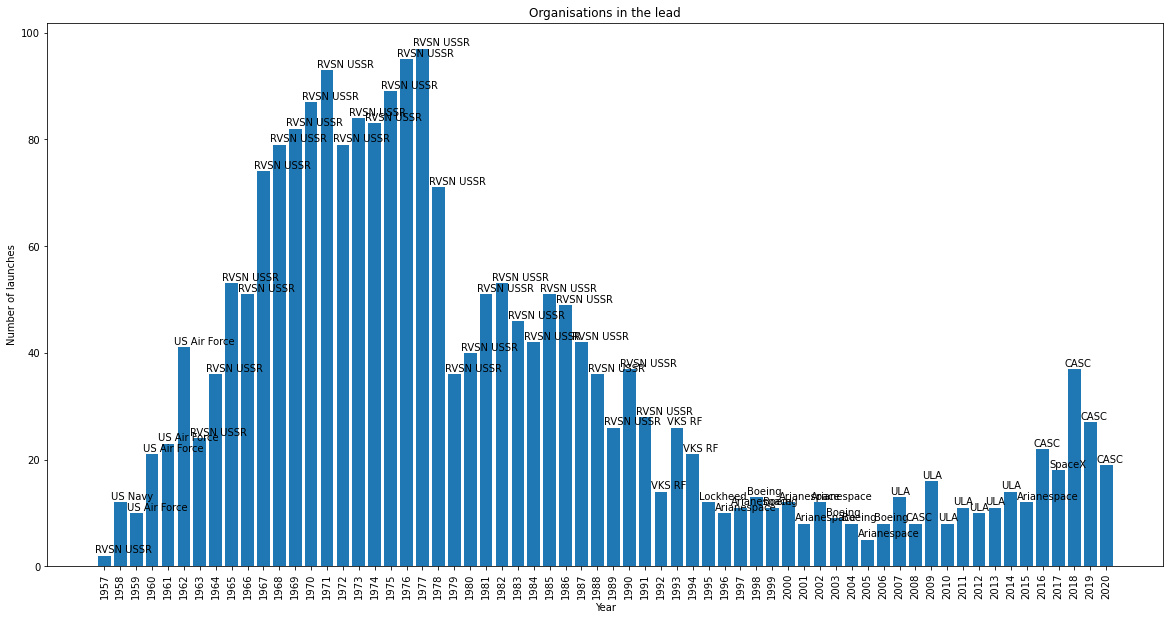

In [565]:
# function to add value labels
def addlabels(x,y,z):
    for i in range(len(x)):
        plt.text(i-0.6,y[i]+0.5,z[i])
 
# plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.figure(figsize=(20,10))

# creating data on which bar chart will be plot
x = list(df_lead_orgs.index)
y = list(df_lead_orgs['nr_launches'])
z = list(df_lead_orgs['org'])

# making the bar chart on the data
plt.bar(x, y)

# calling the function to add value labels
addlabels(x,y,z)

# giving title to the plot
plt.title("Organisations in the lead")

# giving X and Y labels
plt.xlabel("Year")
plt.ylabel("Number of launches")
plt.xticks(rotation=90)

plt.savefig("images/organisations_in_the_lead.png", facecolor='white', transparent=False, bbox_inches = 'tight')

# visualizing the plot
plt.show()